# **Reading Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
csv_file_path = '/content/CC GENERAL.csv'

df = pd.read_csv(csv_file_path)

df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000



---



# **Data Cleaning**

In [ ]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique()

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

**Visualizing Missing Values**

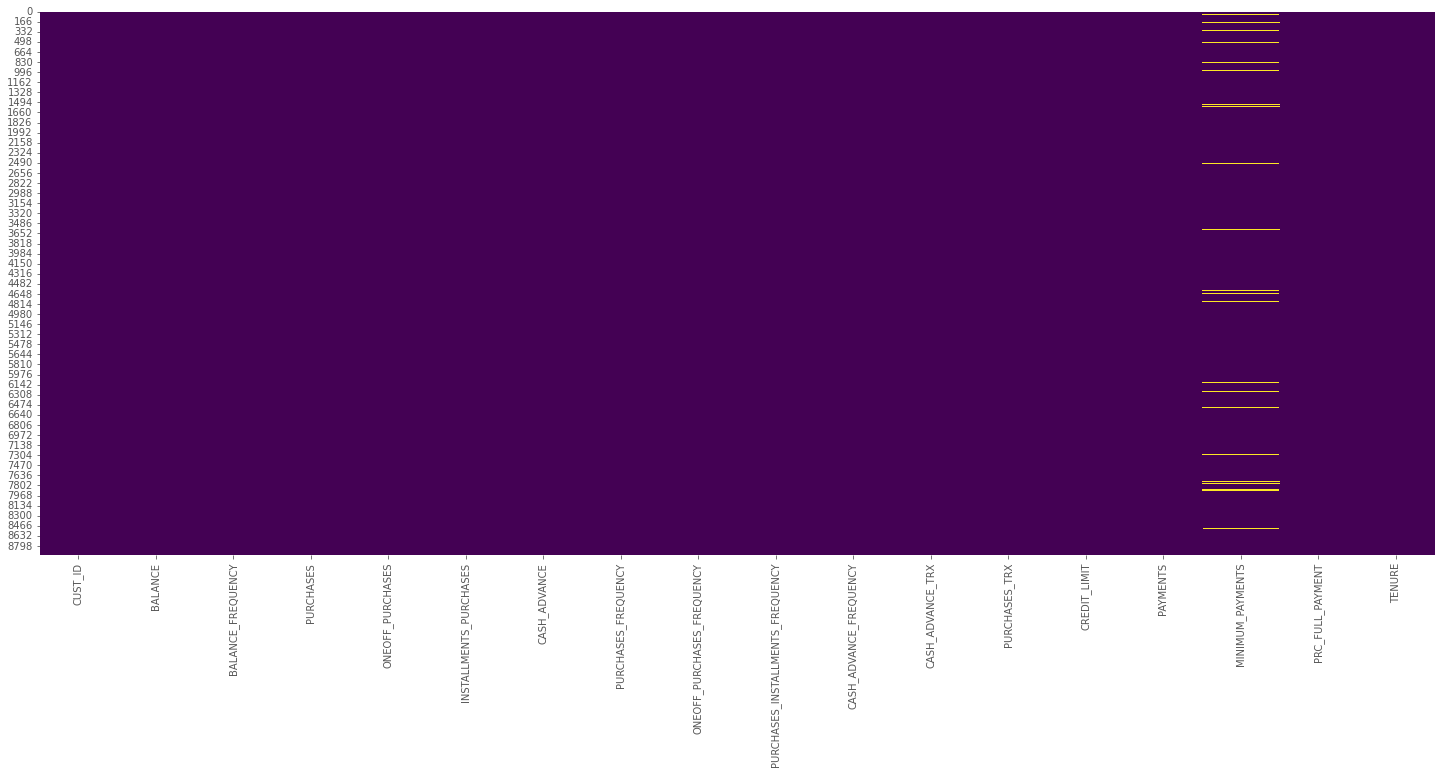

In [ ]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## **Dropping Unwanted Columns and Filling Null Values**




- `'CUST_ID'` is a High Cardanality Feature with unique id for each customer , won't play any role in determining the cluster.

In [ ]:
df.drop(columns='CUST_ID', inplace=True)

- `'CREDIT_LIMIT'` has just 1 record with missing value. We can simply drop it.

In [ ]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

- `'MINIMUM_PAYMENTS'` has 313 records with null values. We could drop it since it's only 0.3% of the colums. 

- But we could also impute it using the median value of the column, since it appear to have outliers like most of the features.

In [ ]:
df['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
df['MINIMUM_PAYMENTS'].fillna( df['MINIMUM_PAYMENTS'].median(), inplace = True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

# **Exploratory Data Analysis**

## **Let's Check the Distributions of Our Features**

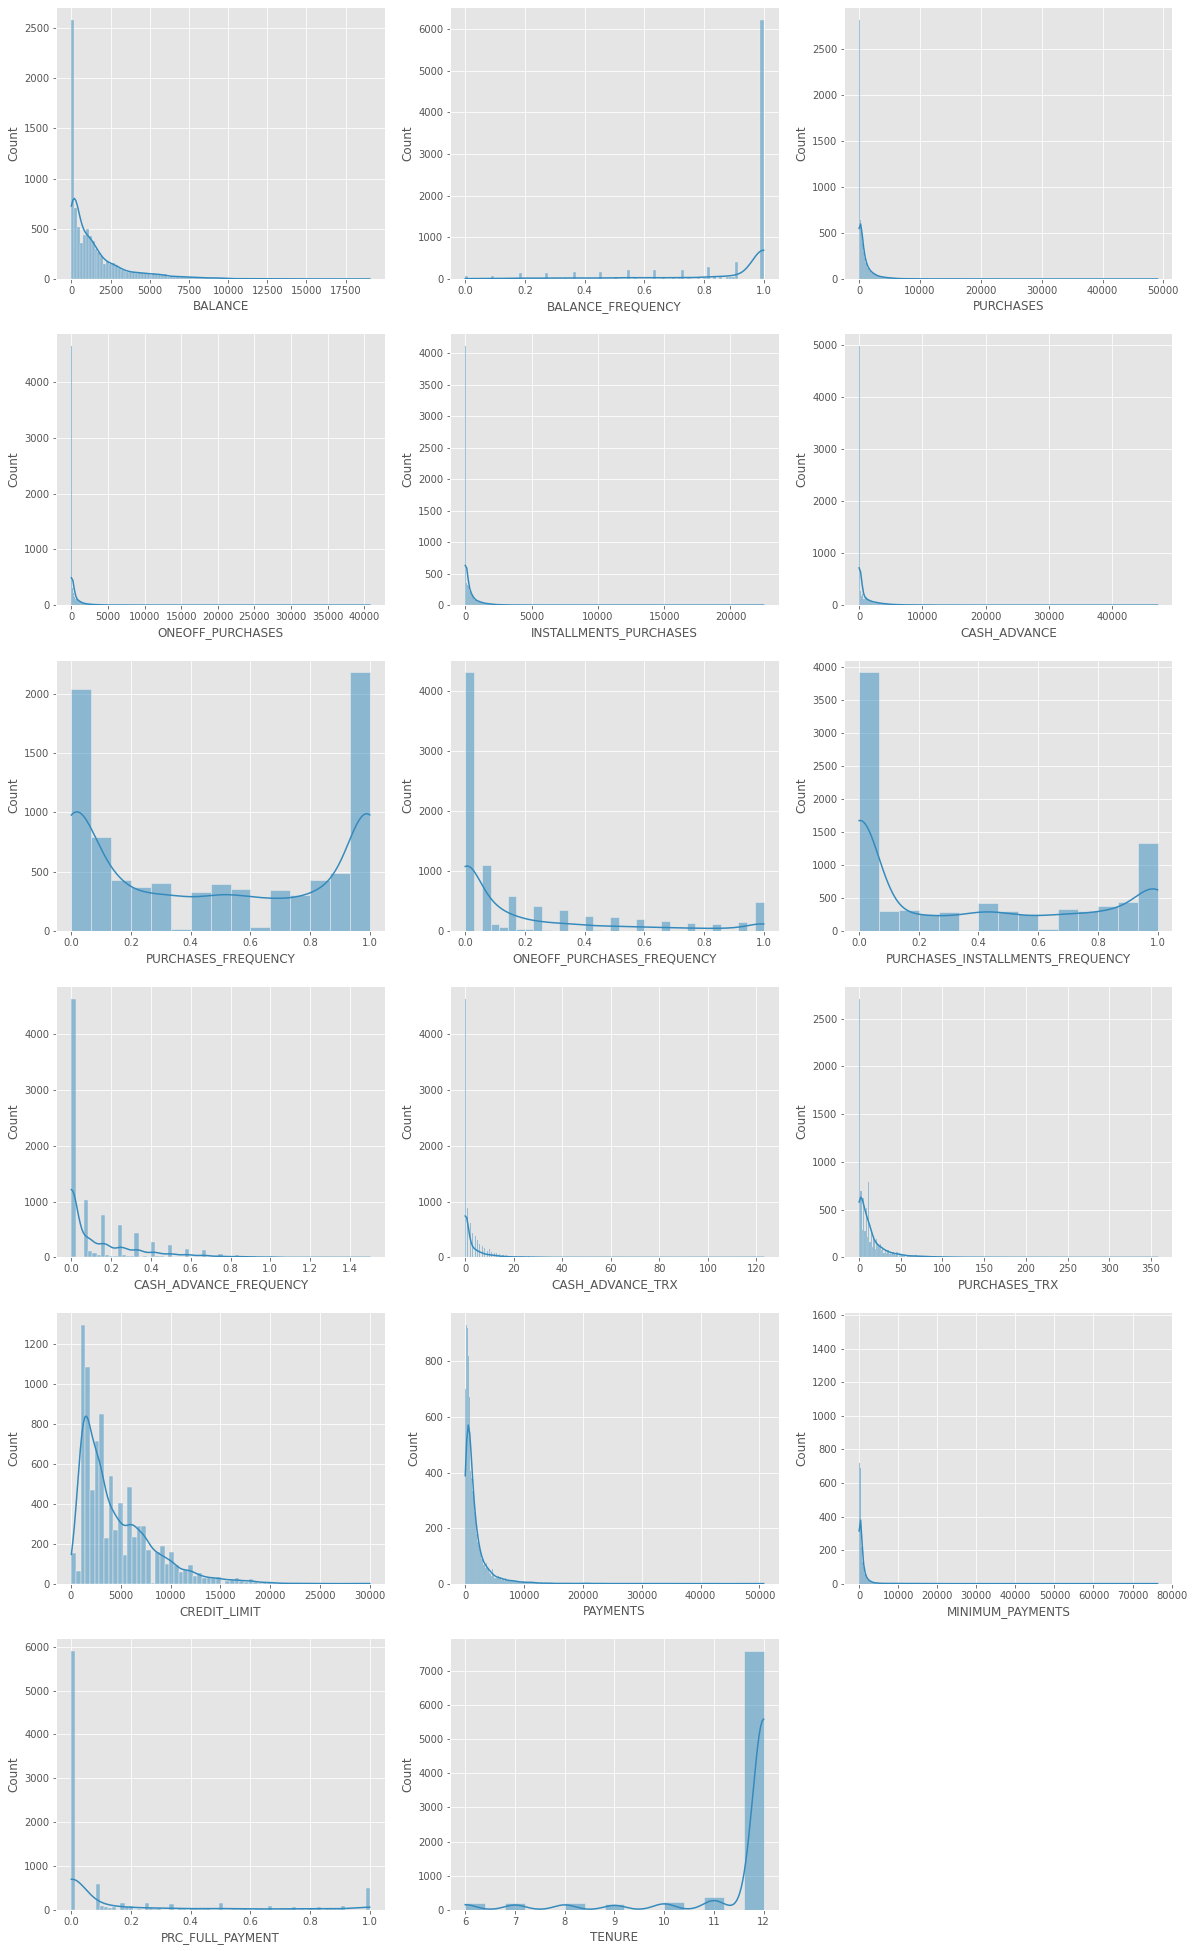

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

- **Most of the Features are Right Skewed with Most of the values being (or close to) zero, Let's Analyze Further.**

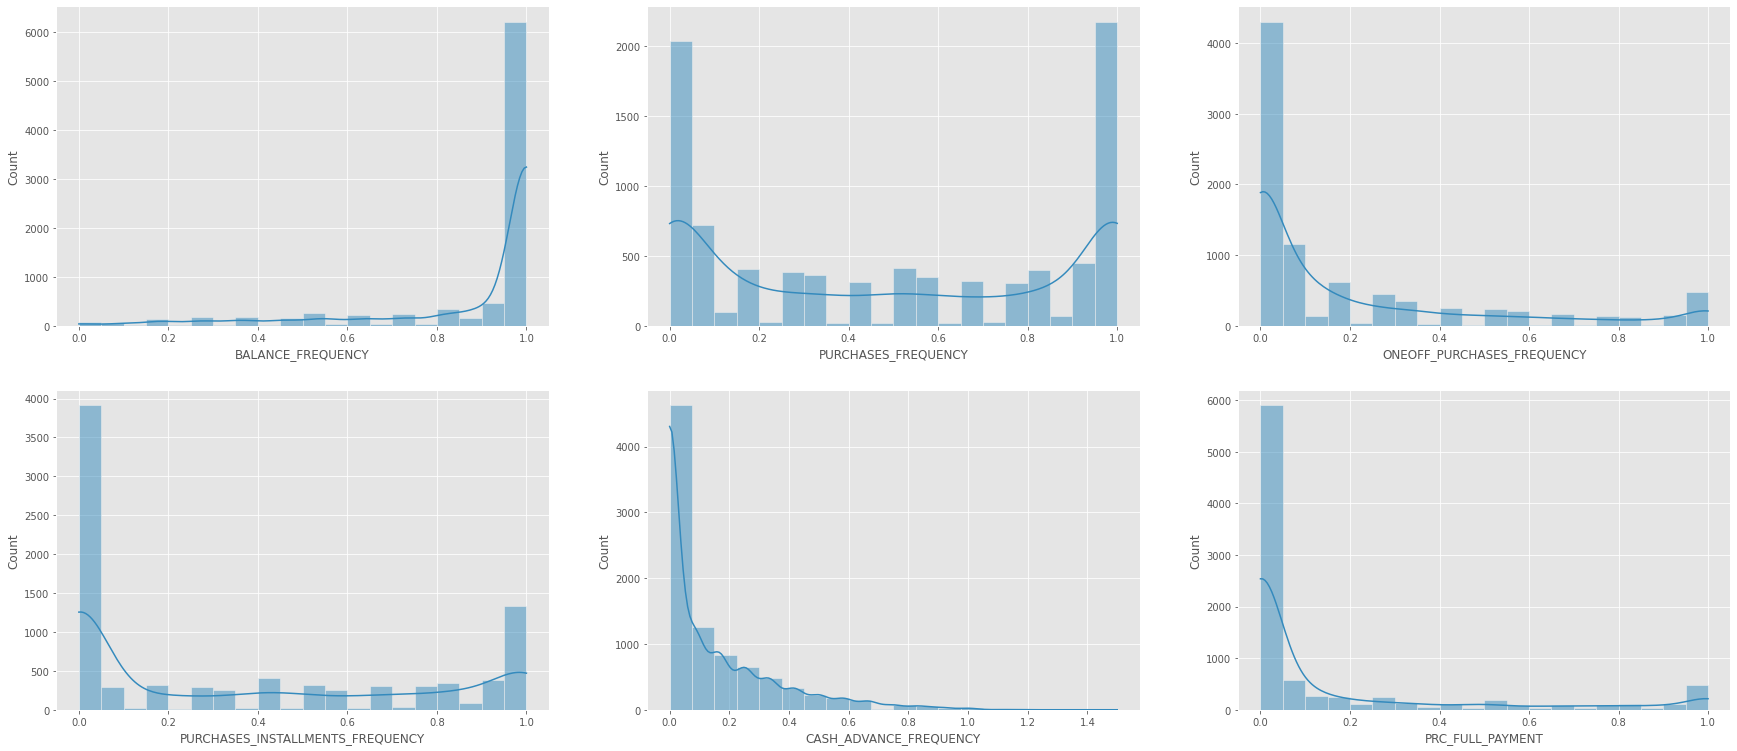

In [ ]:
Freq_Cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

plt.figure(figsize=(30,20))

for i, col in enumerate(df[Freq_Cols]):

        ax = plt.subplot(3, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True, bins=20)

        plt.xlabel(col)
        
plt.show()

- `BALANCE_FREQUENCY` doesn't seem to follow the trend , being left skewed and most of it's values are ones.
- Also `'PURCHASES_FREQUENCY'` with having a similar amount of zeros and ones.

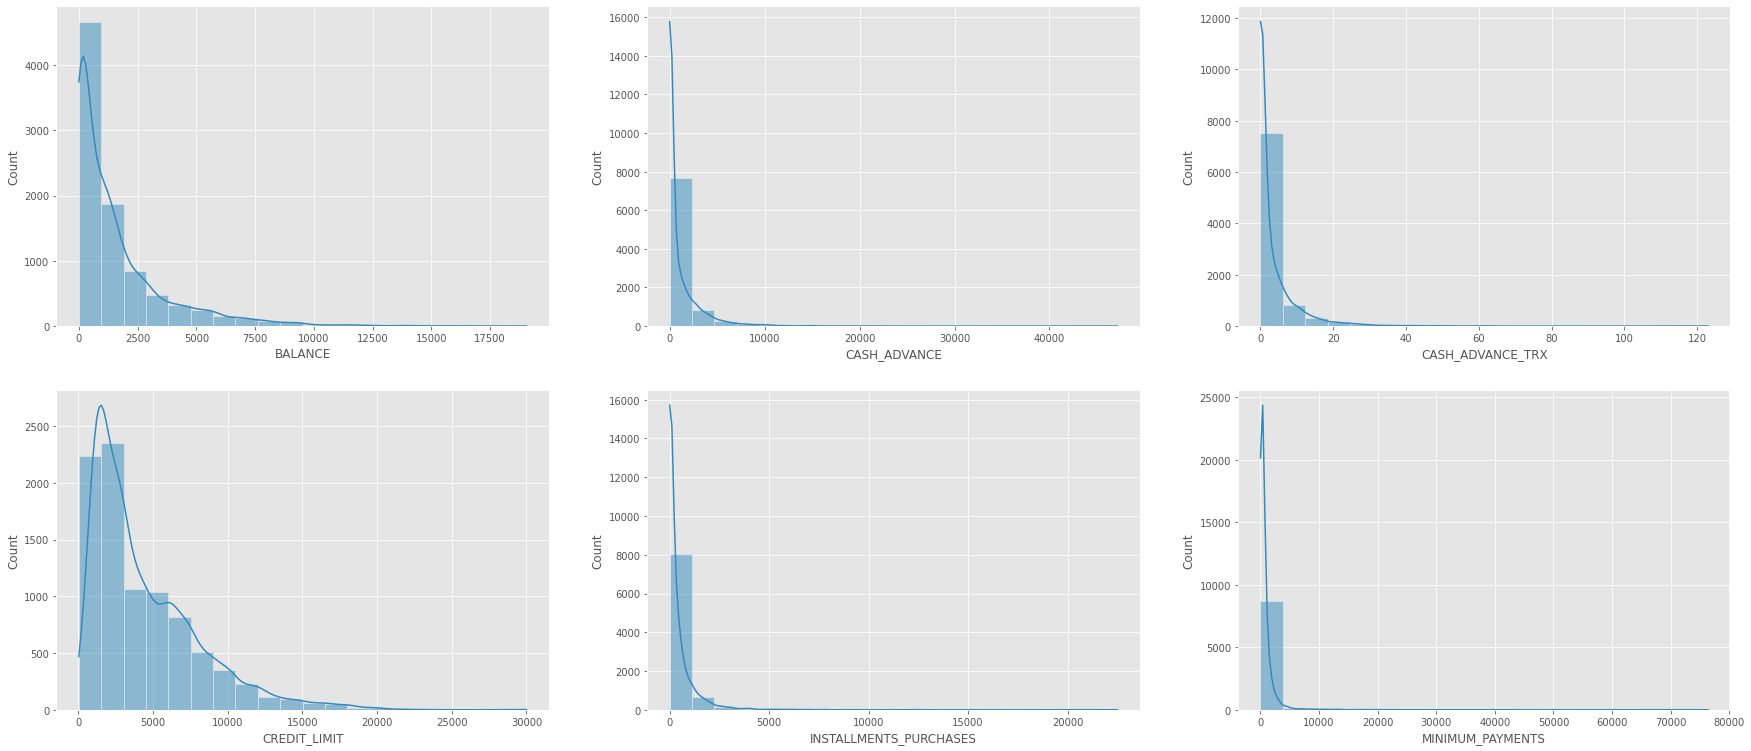

In [ ]:
plt.figure(figsize=(30,20))

for i, col in enumerate(df.columns.difference(Freq_Cols)[:6]):

        ax = plt.subplot(3, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True, bins=20)

        plt.xlabel(col)
        
plt.show()

- **The Rest Features are Positively Skewed with most of it's values being zero, except for a little more range in values with `BALANCE` and `CREDIT_LIMIT`.**

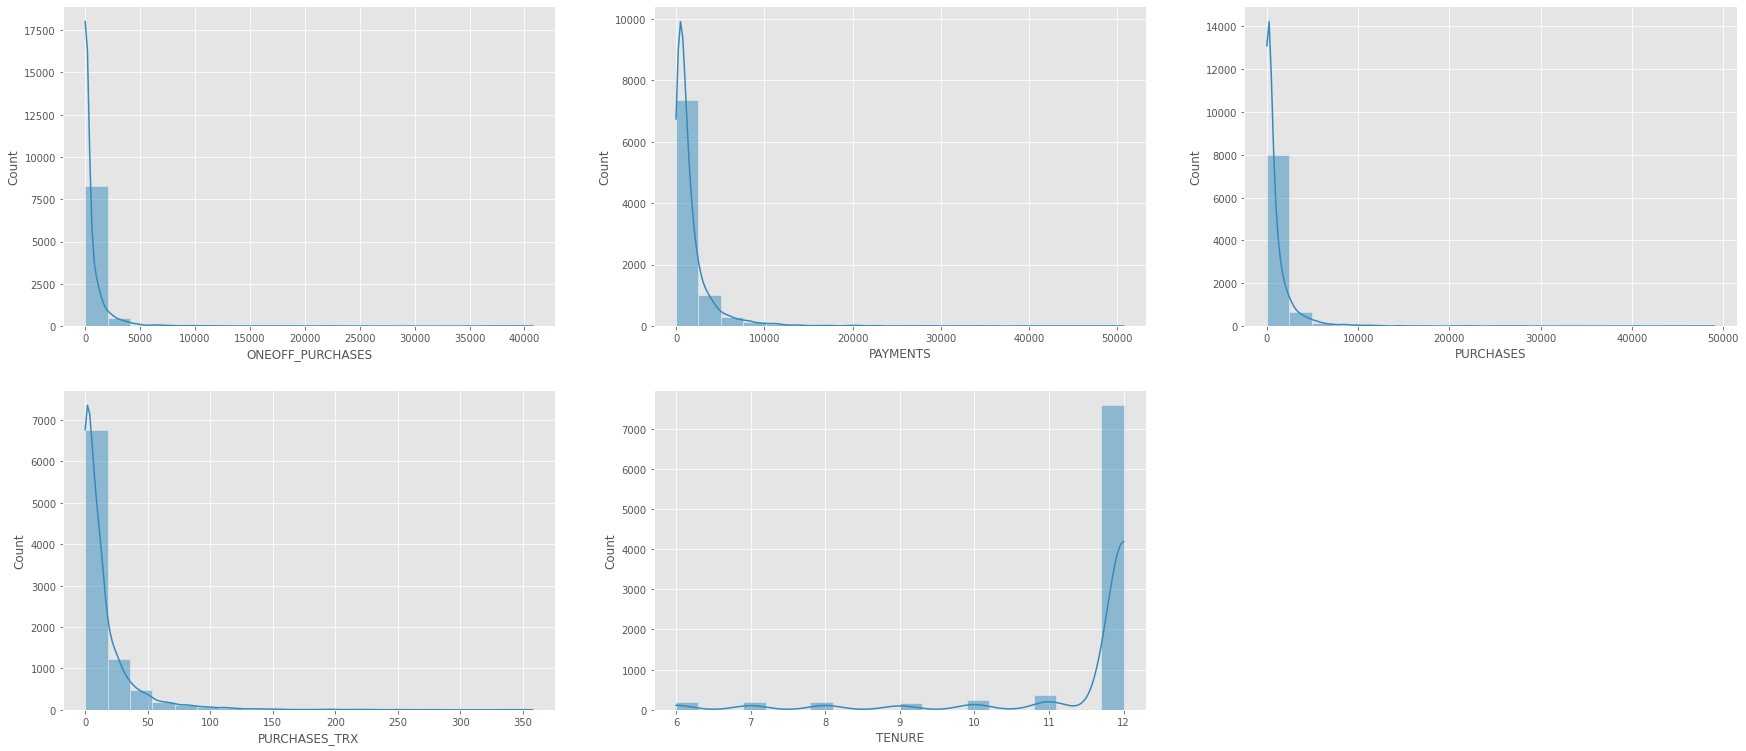

In [ ]:
plt.figure(figsize=(30,20))

for i, col in enumerate(df.columns.difference(Freq_Cols)[6:]):

        ax = plt.subplot(3, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True, bins=20)

        plt.xlabel(col)
        
plt.show()

- **Unlike Most Features `'TENURE'` is Left Skewed with most of it's values being 12.**

## **Now Let's look at the Correlation of the Features**

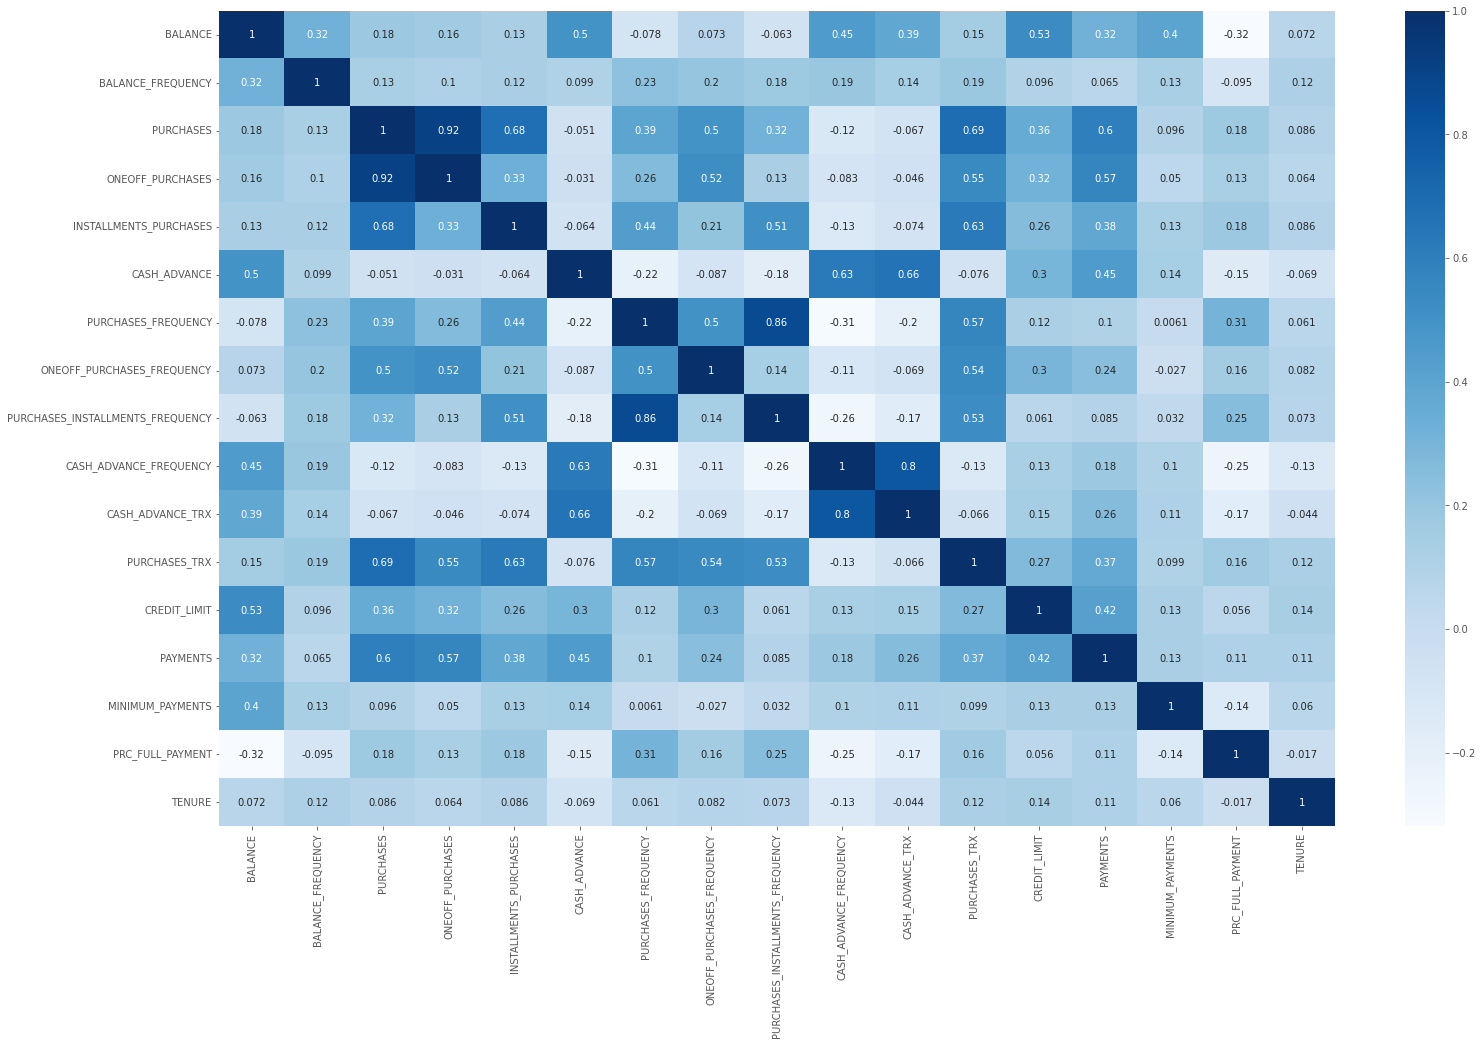

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap( df.corr(), annot=True, cmap='Blues')

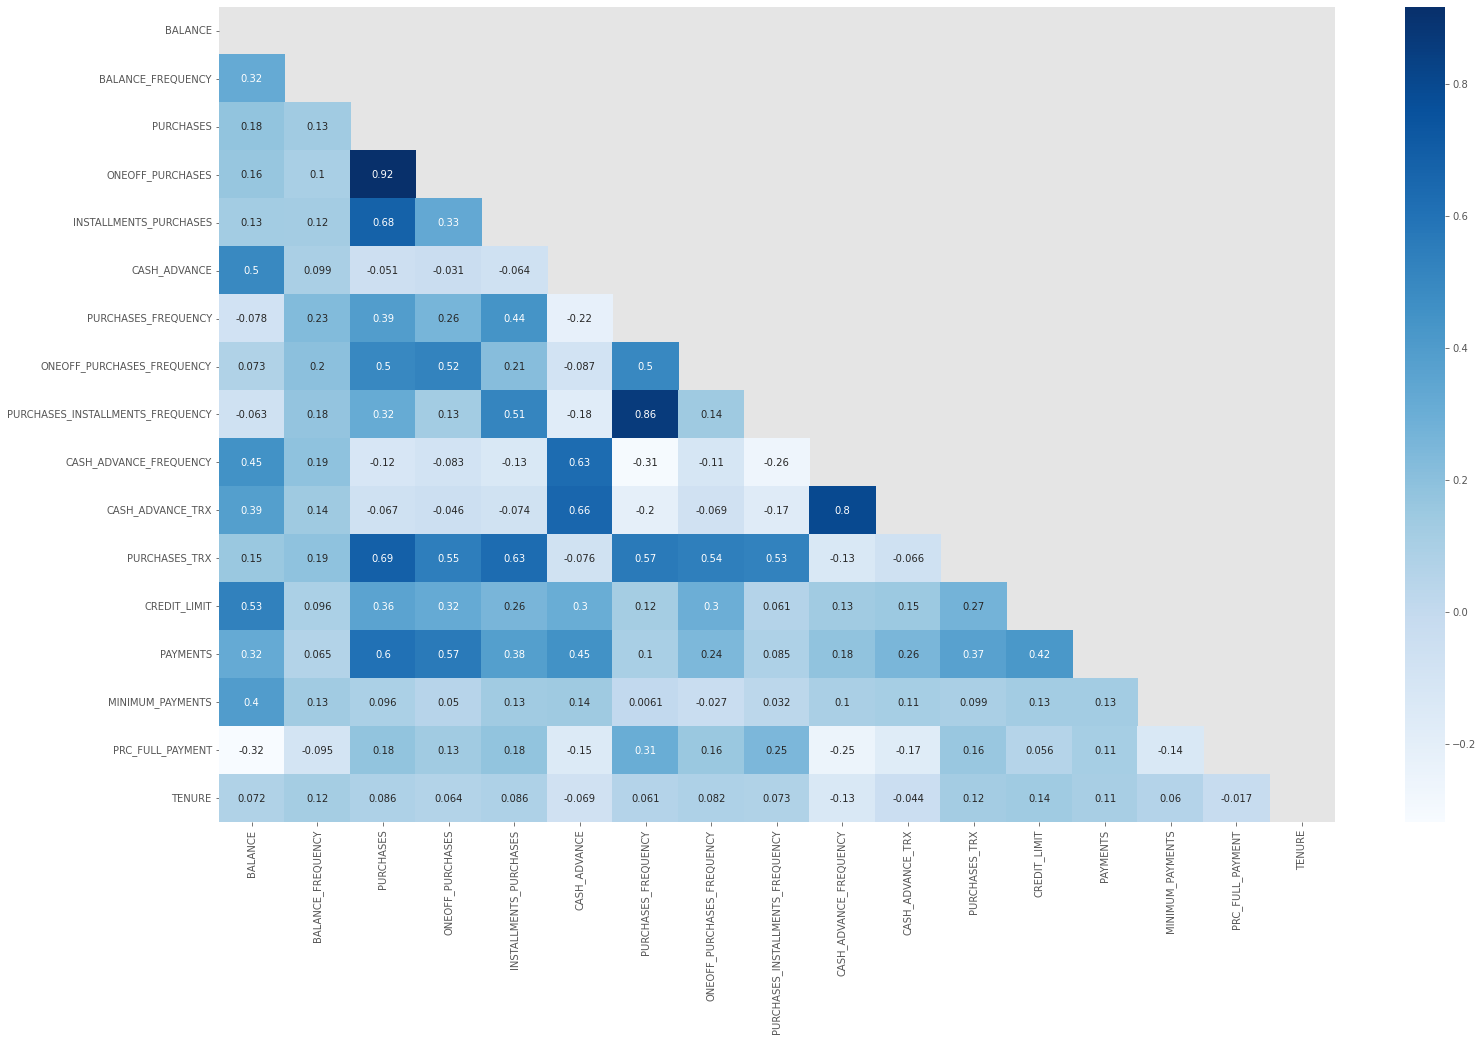

In [ ]:
plt.figure(figsize=(25,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap( df.corr(), annot=True, cmap='Blues', mask=mask)

- **We have many Corralated Features as Most of them are just another way to represent existing ones like the frequency features.**

- **One way to handle this is Dimensionality Reduction with PCA.** 

- **Latent Features can be constructed to incorporate data from multiple features**

# **Data Preprocessing**

## **Removing Outliers**

In [ ]:
df.describe().T

count         mean          std        min  \
BALANCE                           8949.0  1564.647593  2081.584016   0.000000   
BALANCE_FREQUENCY                 8949.0     0.877350     0.236798   0.000000   
PURCHASES                         8949.0  1003.316936  2136.727848   0.000000   
ONEOFF_PURCHASES                  8949.0   592.503572  1659.968851   0.000000   
INSTALLMENTS_PURCHASES            8949.0   411.113579   904.378205   0.000000   
CASH_ADVANCE                      8949.0   978.959616  2097.264344   0.000000   
PURCHASES_FREQUENCY               8949.0     0.490405     0.401360   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8949.0     0.202480     0.298345   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0     0.364478     0.397451   0.000000   
CASH_ADVANCE_FREQUENCY            8949.0     0.135141     0.200132   0.000000   
CASH_ADVANCE_TRX                  8949.0     3.249078     6.824987   0.000000   
PURCHASES_TRX                     8949.0    14.711476    24.858552   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8949.0  1733.336511  2895.168146   0.000000   
MINIMUM_PAYMENTS                  8949.0   845.003358  2332.905284   0.019163   
PRC_FULL_PAYMENT                  8949.0     0.153732     0.292511   0.000000   
TENURE                            8949.0    11.517935     1.337134   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.365782   873.680279  2054.372848   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.800000   361.490000  1110.170000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.830000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.650000   
CASH_ADVANCE                         0.000000     0.000000  1113.868654   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.282850   857.062706  1901.279320   
MINIMUM_PAYMENTS                   170.875613   312.452292   788.721609   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

- **We will first set all outliers as NaN, then impute the missing values.**

In [ ]:
for col in df.columns:

    data = df[col]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
 
    outliers = ( (data < min) | (data > max) )

    df.loc[outliers, col] = np.nan
    
df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     909
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

`KNN imputer`: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [ ]:
imputer = KNNImputer()

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isna().sum()

In [ ]:
df.describe().T

count         mean          std        min  \
BALANCE                           8949.0  1233.932883  1270.655593   0.000000   
BALANCE_FREQUENCY                 8949.0     0.977869     0.060316   0.727273   
PURCHASES                         8949.0   613.994769   673.686479   0.000000   
ONEOFF_PURCHASES                  8949.0   230.821309   345.216962   0.000000   
INSTALLMENTS_PURCHASES            8949.0   224.655985   285.286111   0.000000   
CASH_ADVANCE                      8949.0   453.943700   700.541047   0.000000   
PURCHASES_FREQUENCY               8949.0     0.490405     0.401360   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8949.0     0.169231     0.227225   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0     0.364478     0.397451   0.000000   
CASH_ADVANCE_FREQUENCY            8949.0     0.105060     0.140759   0.000000   
CASH_ADVANCE_TRX                  8949.0     1.762789     2.587516   0.000000   
PURCHASES_TRX                     8949.0    10.405900    10.757735   0.000000   
CREDIT_LIMIT                      8949.0  4282.795634  3102.903071  50.000000   
PAYMENTS                          8949.0  1189.910443   996.381861   0.000000   
MINIMUM_PAYMENTS                  8949.0   488.004281   420.569641   0.019163   
PRC_FULL_PAYMENT                  8949.0     0.031496     0.070105   0.000000   
TENURE                            8949.0    12.000000     0.000000  12.000000   

                                          25%          50%          75%  \
BALANCE                            128.365782   868.331112  1948.434315   
BALANCE_FREQUENCY                    1.000000     1.000000     1.000000   
PURCHASES                           39.580000   360.000000  1027.410000   
ONEOFF_PURCHASES                     0.000000    26.800000   357.342000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   376.000000   
CASH_ADVANCE                         0.000000     0.000000   830.921998   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.272727   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.166667   
CASH_ADVANCE_TRX                     0.000000     0.000000     3.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6250.000000   
PAYMENTS                           383.282850   856.196277  1875.180759   
MINIMUM_PAYMENTS                   170.851668   312.452292   732.747143   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.016667   
TENURE                              12.000000    12.000000    12.000000   

                                           max  
BALANCE                            4940.113918  
BALANCE_FREQUENCY                     1.000000  
PURCHASES                          2711.900000  
ONEOFF_PURCHASES                   1443.330000  
INSTALLMENTS_PURCHASES             1170.490000  
CASH_ADVANCE                       2784.294727  
PURCHASES_FREQUENCY                   1.000000  
ONEOFF_PURCHASES_FREQUENCY            0.750000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000  
CASH_ADVANCE_FREQUENCY                0.545455  
CASH_ADVANCE_TRX                     10.000000  
PURCHASES_TRX                        41.000000  
CREDIT_LIMIT                      13600.000000  
PAYMENTS                           4177.324826  
MINIMUM_PAYMENTS                   1712.713459  
PRC_FULL_PAYMENT                      0.333333  
TENURE                               12.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

## **Applying Log Transformation**

> **To handle the Skewness in our Features**

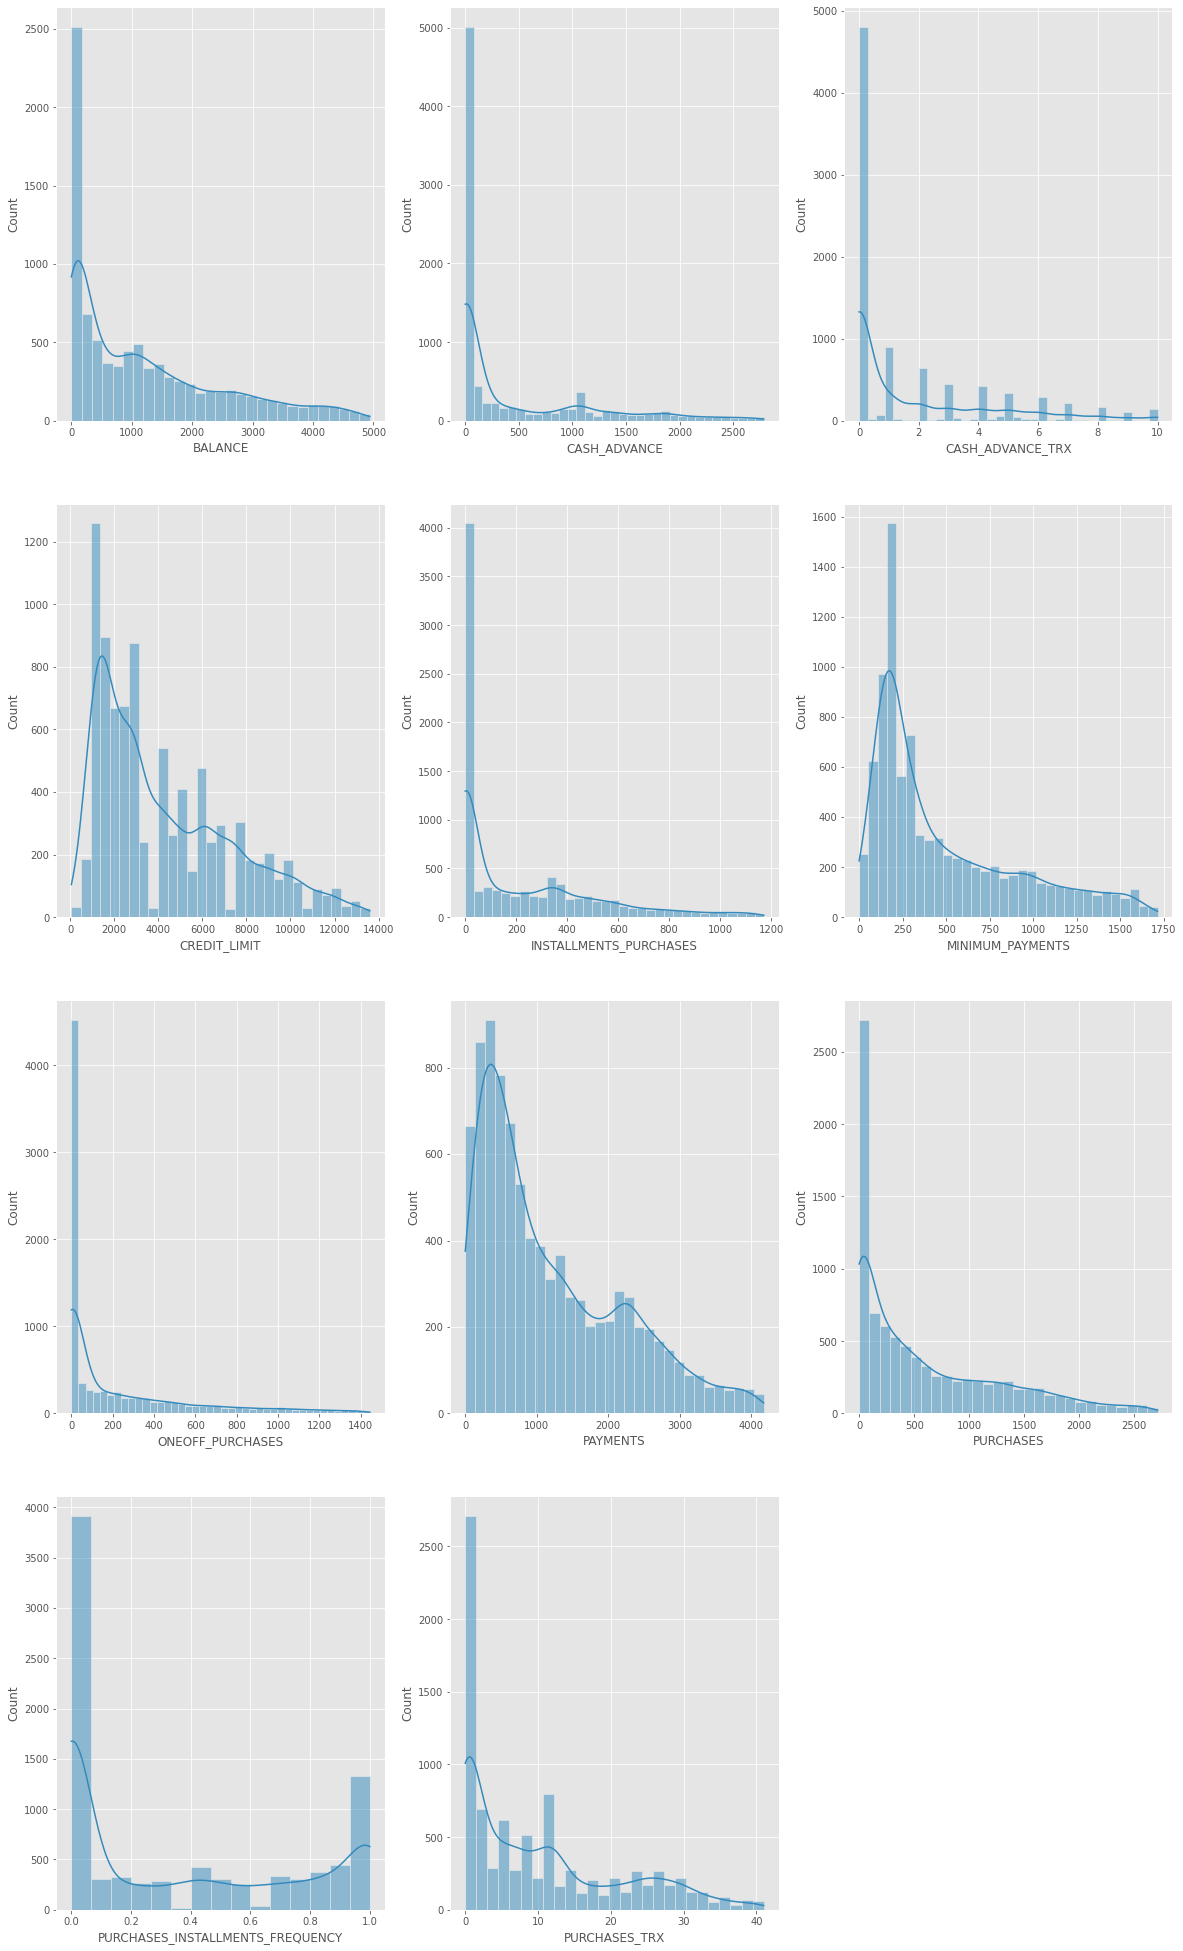

In [ ]:
Skewed_Cols = df.columns.difference(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                    'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT', 'TENURE'])

plt.figure(figsize=(20,35))

for i, col in enumerate(df[Skewed_Cols]):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

In [ ]:
trans_df = df.copy()

for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

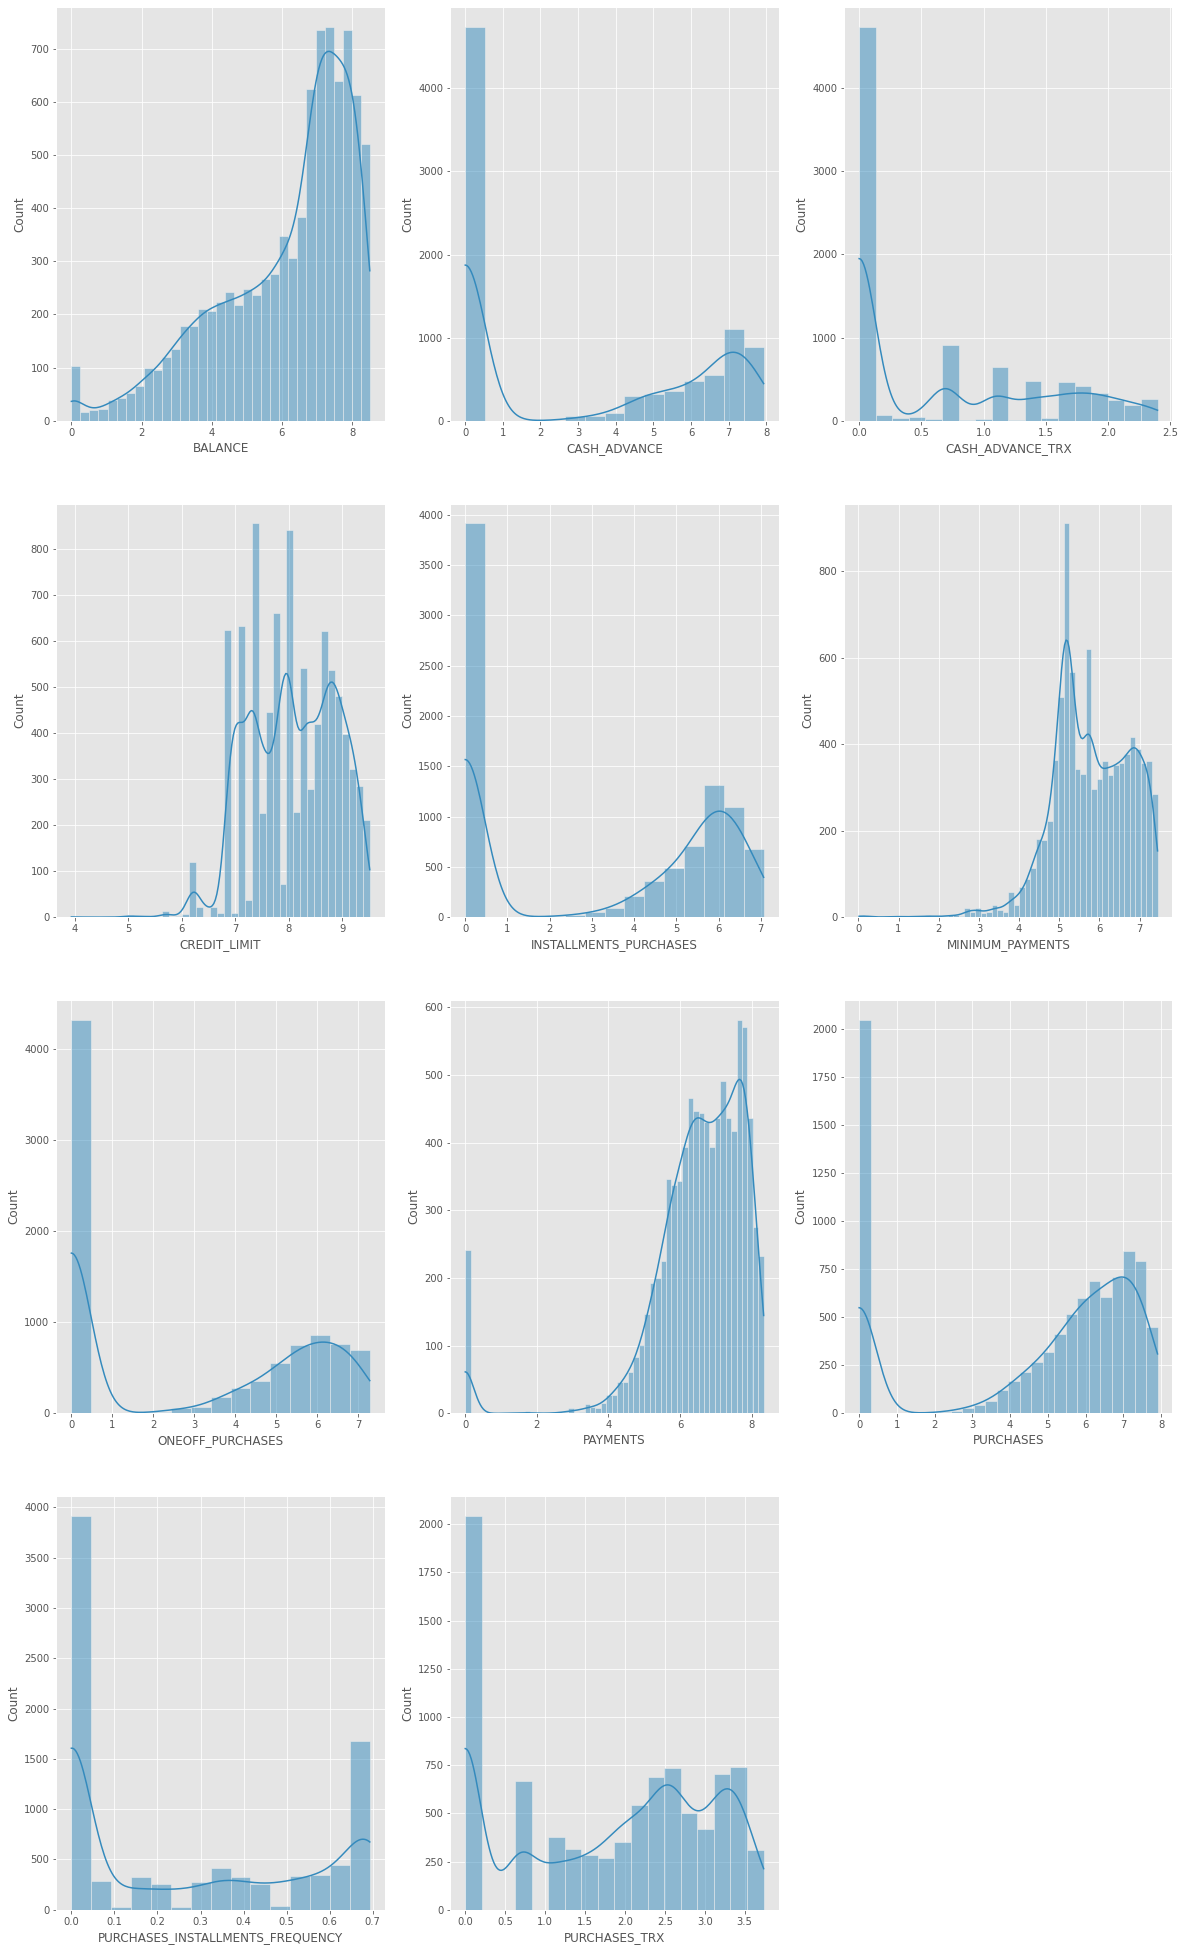

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(trans_df[Skewed_Cols]):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(trans_df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

- **Not as Symmetric but better than the original Skewness**.

In [ ]:
trans_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.818182   4.568506          0.000000   
1     8.071989           0.909091   0.000000          0.000000   
2     7.822504           1.000000   6.651791          6.651791   
3     7.419183           0.981818   7.313220          5.739529   
4     6.707735           1.000000   2.833213          2.833213   
...        ...                ...        ...               ...   
8944  3.384170           1.000000   5.677165          0.000000   
8945  3.004851           1.000000   5.707110          0.000000   
8946  3.194529           0.833333   4.979489          0.000000   
8947  2.671218           0.833333   0.000000          0.000000   
8948  5.923475           1.000000   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.166667   
1                   0.000000      6.974598             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      5.331694             0.083333   
4                   0.000000      0.000000             0.083333   
...                      ...           ...                  ...   
8944                5.677165      0.000000             1.000000   
8945                5.707110      0.000000             1.000000   
8946                4.979489      0.000000             0.833333   
8947                0.000000      3.625907             0.000000   
8948                0.000000      4.852343             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.650000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.606136   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.510826   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.250000          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.083333          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8944                0.000000          0.000000       1.945910      6.908755   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.791759      6.908755   
8947                0.166667          1.098612       0.000000      6.216606   
8948                0.333333          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     5.312231          4.945277          0.000000    12.0  
1     8.319725          6.978531          0.222222    12.0  
2     6.434654          6.442994          0.000000    12.0  
3     0.000000          5.747647          0.000000    12.0  
4     6.521114          5.504483          0.000000    12.0  
...        ...               ...               ...     ...  
8944  5.788719          3.909748          0.016667    12.0  
8945  5.623517          5.747647          0.000000    12.0  
8946  4.410016          4.423869          0.250000    12.0  
8947  3.9

In [ ]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

## **Scaling Features**

**Standardizing with StandardScaler**
> Changes Values but keeps the same distribution

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()
df_scaled = Scaler.fit_transform(trans_df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.218018          -2.647658  -0.075787         -0.996249   
1     1.025958          -1.140357  -1.713220         -0.996249   
2     0.896865           0.366944   0.670899          1.270704   
3     0.688170           0.065483   0.907966          0.959802   
4     0.320038           0.366944  -0.697747         -0.030681   
...        ...                ...        ...               ...   
8944 -1.399709           0.366944   0.321575         -0.996249   
8945 -1.595984           0.366944   0.332308         -0.996249   
8946 -1.497837          -2.396449   0.071516         -0.996249   
8947 -1.768619          -2.396449  -1.713220         -0.996249   
8948 -0.085770           0.366944   0.794923          1.388633   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.471989     -0.915486            -0.806649   
1                  -1.103750      1.202677            -1.221928   
2                  -1.103750     -0.915486             1.269742   
3                  -1.103750      0.703732            -1.014290   
4                  -1.103750     -0.915486            -1.014290   
...                      ...           ...                  ...   
8944                0.854380     -0.915486             1.269742   
8945                0.864709     -0.915486             1.269742   
8946                0.613742     -0.915486             0.854463   
8947               -1.103750      0.185690            -1.221928   
8948               -1.103750      0.558155             0.439186   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.744814                         -0.674357   
1                      -0.744814                         -0.958359   
2                       2.115946                         -0.958359   
3                      -0.378051                         -0.958359   
4                      -0.378051                         -0.958359   
...                          ...                               ...   
8944                   -0.744814                          1.192296   
8945                   -0.744814                          1.192296   
8946                   -0.744814                          0.854123   
8947                   -0.744814                         -0.958359   
8948                    2.189301                         -0.958359   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.746426         -0.822942      -0.572416     -1.475368   
1                   1.029758          1.185864      -1.451115      0.980622   
2                  -0.746426         -0.822942       0.600400      1.067726   
3                  -0.154367          0.042204      -0.896717      1.067726   
4                  -0.746426         -0.822942      -0.896717     -1.245363   
...                      ...               ...            ...           ...   
8944               -0.746426         -0.822942       0.105276     -1.475368   
8945               -0.746426         -0.822942       0.105276     -1.475368   
8946               -0.746426         -0.822942      -0.018018     -1.475368   
8947                0.437699          0.548281      -1.451115     -2.349333   
8948                1.621817          0.548281       1.090778     -1.245363   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    -0.825161         -0.877686         -0.449298     0.0  
1     1.222599          1.229472          2.720734     0.0  
2    -0.060919          0.674469         -0.449298     0.0  
3    -4.442181         -0.046152         -0.449298     0.0  
4    -0.002050         -0.298155         -0.449298     0.0  
...        ...               ...               ...     ...  
8944 -0.500727         -1.950854         -0.211547     0.0  
8945 -0.613211         -0.046152         -0.449298     0.0  
8946 -1.439466         -1.418046          3.116992     0.0  
8947 -1.7

In [ ]:
df_scaled.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.949000e+03       8.949000e+03  8.949000e+03      8.949000e+03   
mean  -3.175965e-17       9.813731e-16 -7.939912e-18      1.715021e-16   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -3.150815e+00      -4.154958e+00 -1.713220e+00     -9.962491e-01   
25%   -6.346868e-01       3.669435e-01 -3.859012e-01     -9.962491e-01   
50%    3.510786e-01       3.669435e-01  3.974570e-01      1.369343e-01   
75%    7.689482e-01       3.669435e-01  7.726811e-01      1.008182e+00   
max    1.250194e+00       3.669435e-01  1.120348e+00      1.483232e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.949000e+03  8.949000e+03         8.949000e+03   
mean            -1.703111e-16  1.619742e-16         7.701715e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -1.103750e+00 -9.154864e-01        -1.221928e+00   
25%             -1.103750e+00 -9.154864e-01        -1.014290e+00   
50%              4.482943e-01 -9.154864e-01         2.390672e-02   
75%              9.423606e-01  1.126492e+00         1.062103e+00   
max              1.333419e+00  1.493470e+00         1.269742e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.949000e+03                       8949.000000   
mean                -6.351930e-17                          0.000000   
std                  1.000056e+00                          1.000056   
min                 -7.448135e-01                         -0.958359   
25%                 -7.448135e-01                         -0.958359   
50%                 -3.780509e-01                         -0.411410   
75%                  4.555042e-01                          1.027237   
max                  2.556063e+00                          1.501025   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.949000e+03      8.949000e+03   8.949000e+03  8.949000e+03   
mean            -9.686693e-17      7.334494e-17   1.794420e-16 -5.081544e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -7.464261e-01     -8.229421e-01  -1.451115e+00 -5.234291e+00   
25%             -7.464261e-01     -8.229421e-01  -8.967175e-01 -8.823744e-01   
50%             -7.464261e-01     -8.229421e-01   2.120781e-01 -8.900788e-02   
75%              4.376991e-01      9.073494e-01   8.606819e-01  8.375450e-01   
max              3.128888e+00      2.169970e+00   1.538374e+00  1.819159e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
count  8.949000e+03      8.949000e+03      8.949000e+03  8949.0  
mean   2.286695e-16     -1.219571e-15     -6.193131e-17     0.0  
std    1.000056e+00      1.000056e+00      1.000056e+00     0.0  
min   -4.442181e+00     -5.983040e+00     -4.492984e-01     0.0  
25%   -3.899740e-01     -6.690125e-01     -4.492984e-01     0.0  
50%    1.562923e-01     -4.615160e-02     -4.492984e-01     0.0  
75%    6.896479e-01      8.352800e-01     -2.115467e-01     0.0  
max    1.234814e+00      1.714365e+00      4.305751e+00     0.0



---



# **Dimensionality Reduction with PCA**

In [ ]:
from sklearn.decomposition import PCA

### **PCA to All Features**

In [ ]:
pca = PCA()

X_pca = pca.fit_transform(df_scaled)

- **First, We will Make Componentes to all features in the data.**

- **Then decide how many components are needed based on the cumulative explained variance by the components.**

In [ ]:
# Convert to dataframe

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.070052  3.130725  0.006426  0.663863 -0.066947  2.462336  0.613870   
1  3.672899 -1.014127  0.494287  2.506466 -2.158939 -0.484540  0.574163   
2 -1.523370 -1.488558 -2.740842 -0.786773 -0.155579 -0.083975  0.046930   
3  1.377642  0.858935 -1.745873 -1.311754  1.696539  0.602935 -1.823662   
4  1.074890  1.564631 -1.307714 -0.927584 -0.375357 -0.111139  1.387989   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.140583 -0.188902  0.281169 -0.019333 -0.617596  0.614756 -0.021266   
1 -1.200474  0.254478  0.103938 -0.124555 -0.051623 -0.193422 -0.103815   
2 -0.590834  1.088823  0.304249 -0.012636  0.870089  0.153080 -0.091877   
3 -3.131847 -1.126612 -1.118521  0.550070  0.737795  0.496022  0.288139   
4  0.467199 -0.041152 -0.110663  0.472612  0.110421 -0.121560 -0.099084   

       PC15      PC16  PC17  
0  0.062954  0.121147   0.0  
1 -0.006647  0.022660  -0.0  
2  0.106218  0.578616   0.0  
3  0.661877 -0.138007  -0.0  
4 -0.048028 -0.056370   0.0

In [ ]:
pca.explained_variance_ratio_

array([0.35733885, 0.19072976, 0.10161591, 0.07789891, 0.06131029,
       0.0565059 , 0.04644336, 0.0371944 , 0.02038308, 0.01273563,
       0.01107865, 0.00945783, 0.00828529, 0.00445746, 0.00256001,
       0.00200469, 0.        ])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.35733885, 0.54806861, 0.64968452, 0.72758343, 0.78889371,
       0.84539962, 0.89184298, 0.92903738, 0.94942045, 0.96215608,
       0.97323473, 0.98269256, 0.99097785, 0.9954353 , 0.99799531,
       1.        , 1.        ])

In [ ]:
def plot_variance(pca, width=8, dpi=100):
  
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure

    fig.set(figwidth=8, dpi=100)
    return axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbe0375880>,
      dtype=object)

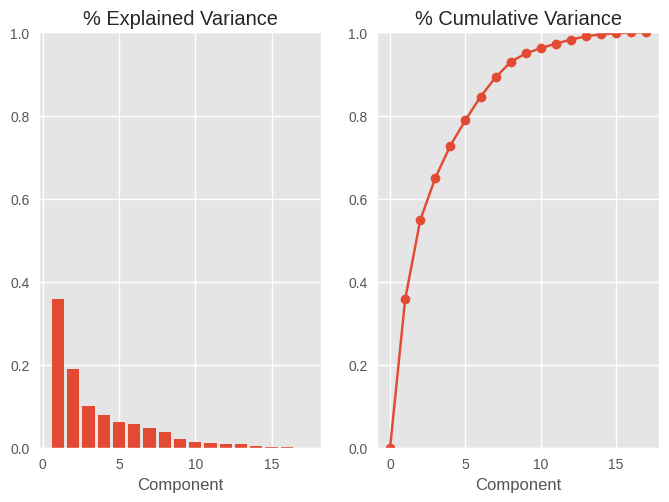

In [ ]:
plot_variance(pca)

- **About 80% of the Variance in the data is explained by only 5 components.**

- **And About 90% of the variance in the data is explained by only 7 components.**

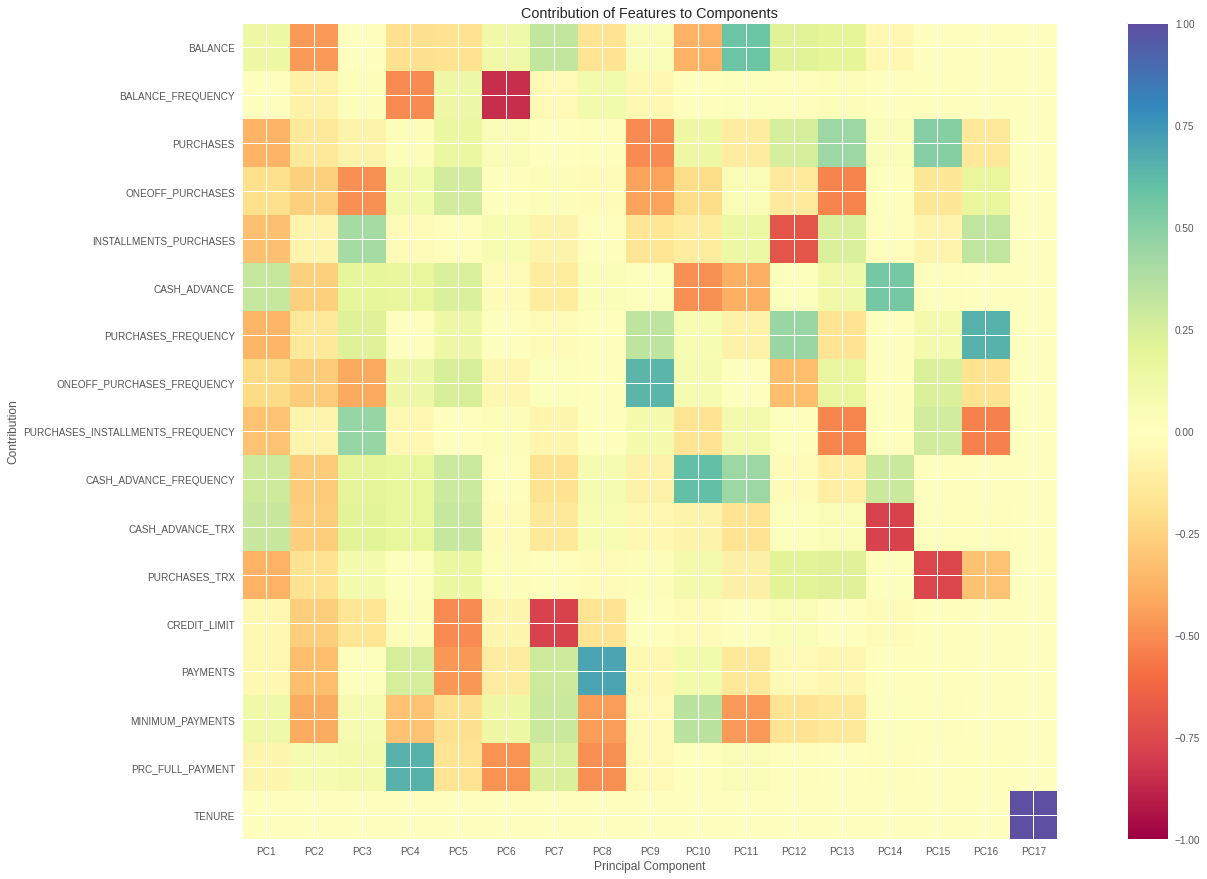

In [ ]:
plt.figure(figsize=(25,15))

plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )

plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(X_pca.columns)), X_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

- **Seems Like Purchase Features are not that Important to PCA Components compared to Cash Features.**

### **Finding Optimum Number of Components**

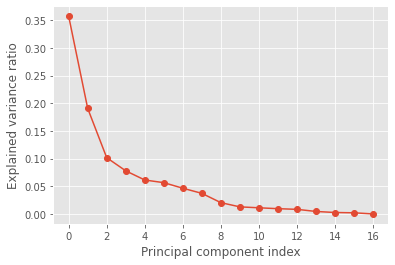

In [ ]:
# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_, '-o')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

- **We will go with 5 Components since it gives least amount of dimensions with more explained varaince.**

In [ ]:
pca = PCA(n_components = 5 )

X_pca = pca.fit_transform(df_scaled)

In [ ]:
# Convert to dataframe

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4       PC5
0  0.070052  3.130725  0.006426  0.663863 -0.066947
1  3.672899 -1.014127  0.494287  2.506466 -2.158939
2 -1.523370 -1.488558 -2.740842 -0.786773 -0.155578
3  1.377642  0.858935 -1.745873 -1.311754  1.696539
4  1.074890  1.564631 -1.307714 -0.927584 -0.375357

In [ ]:
pca.explained_variance_ratio_

array([0.35733885, 0.19072976, 0.10161591, 0.07789891, 0.06131029])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.35733885, 0.54806861, 0.64968452, 0.72758343, 0.78889371])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbea1fde80>,
      dtype=object)

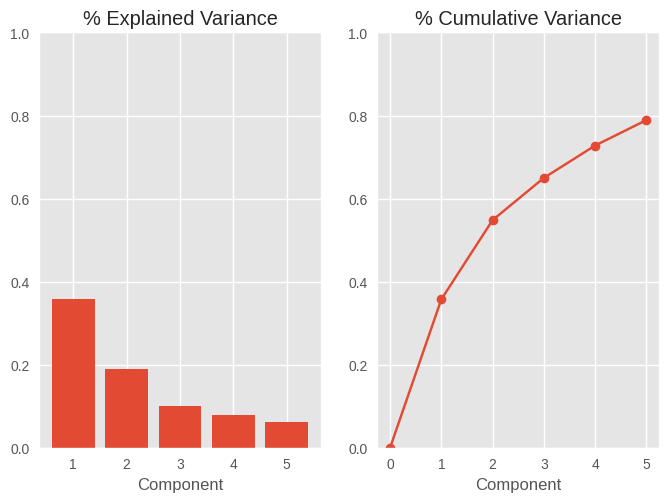

In [ ]:
plot_variance(pca)

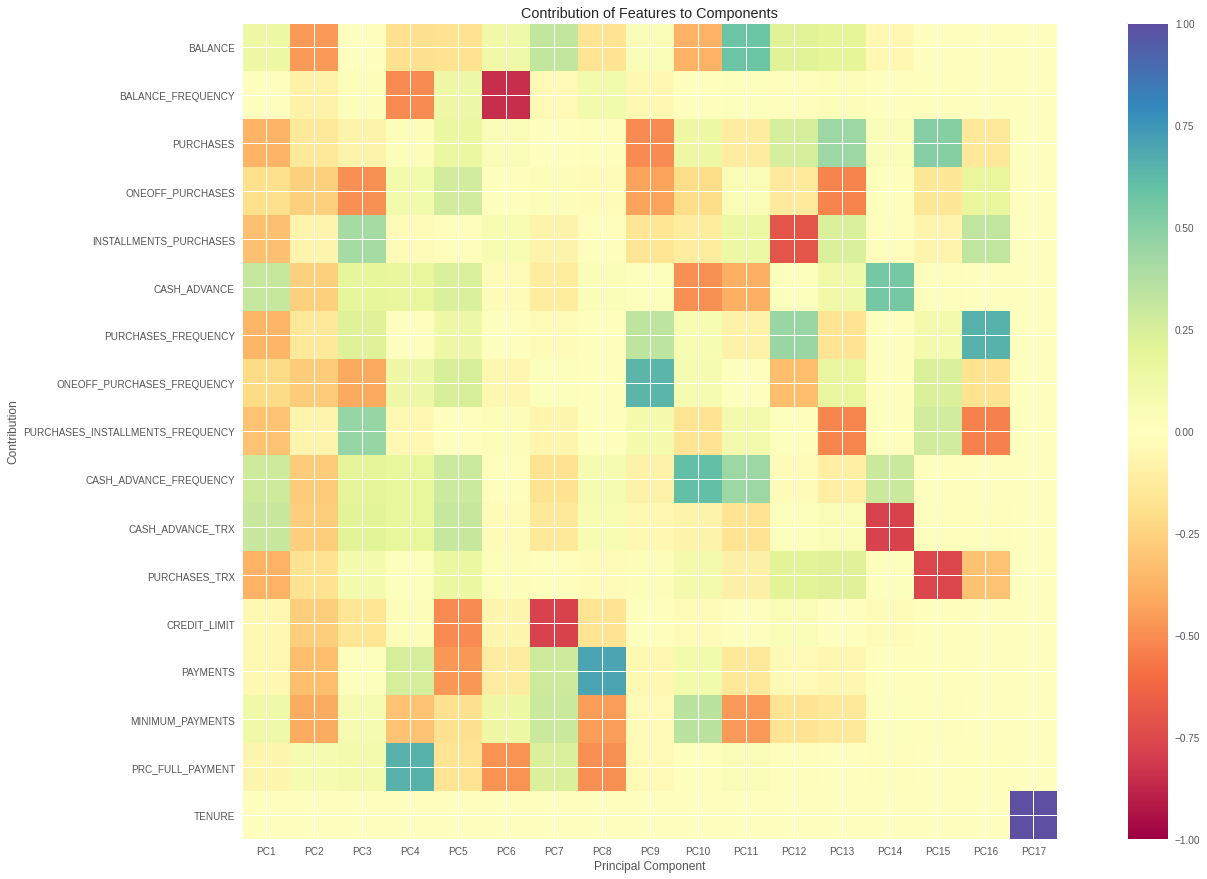

In [ ]:
plt.figure(figsize=(25,15))

plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )

plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(X_pca.columns)), X_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()



---



# **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## **With Scaled Data**

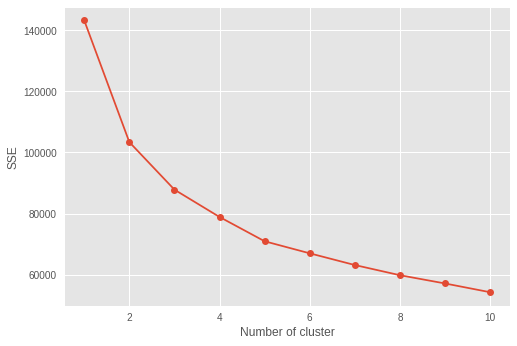

In [ ]:
n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmean= KMeans(n_cluster, random_state=0)

    kmean.fit(df_scaled)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

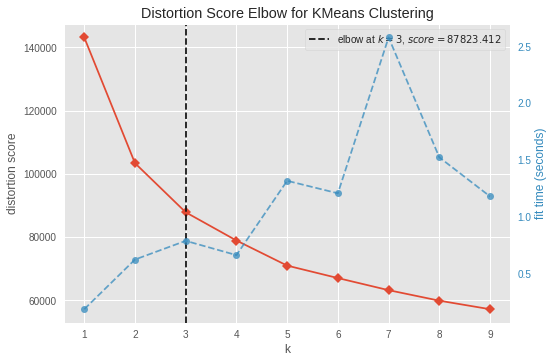

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

- **Seems Like Customers can be grouped to 3 or 4 Clusters.**

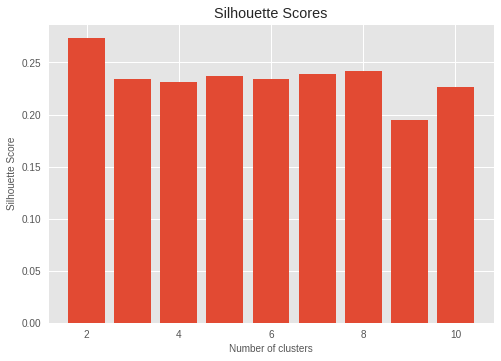

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  silhouette_scores.append(silhouette_score(df_scaled, labels))
    
plt.bar(range(2 , n_clusters+1), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()

- **Silhoutte Score for 2 Clusters are Better ,But we will Check the Clusters Distributions with Silhoutte Diagram.**

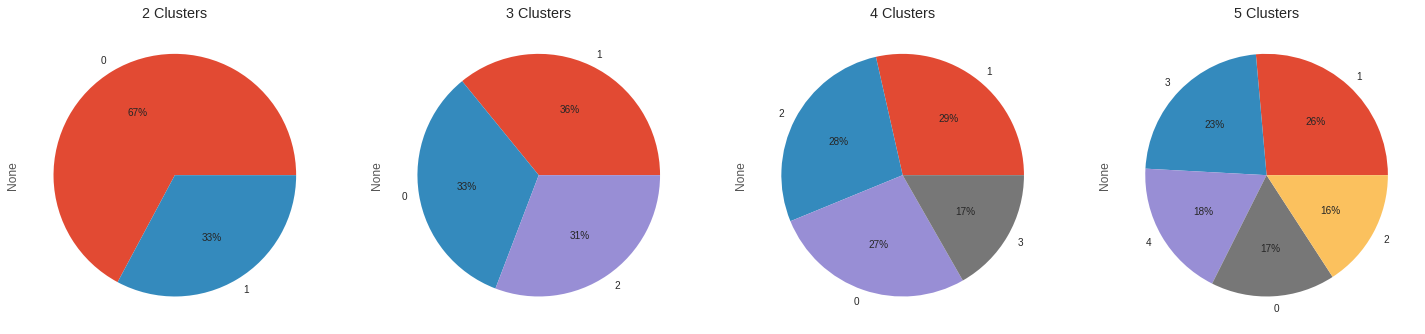

In [ ]:
plt.figure(figsize=(25,25))

for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  labels = pd.Series(labels)

  ax = plt.subplot(1 , 4, i+1)

  ax.set_title(f"{n_cluster} Clusters")

  labels.value_counts().plot.pie(autopct='%1.0f%%', ax = ax)

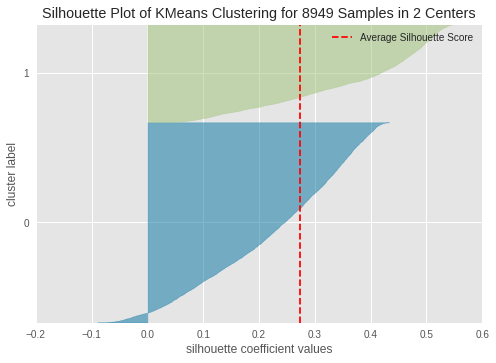

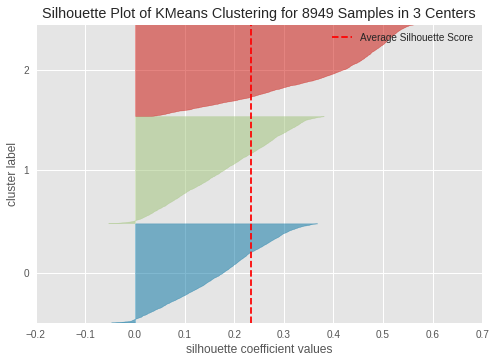

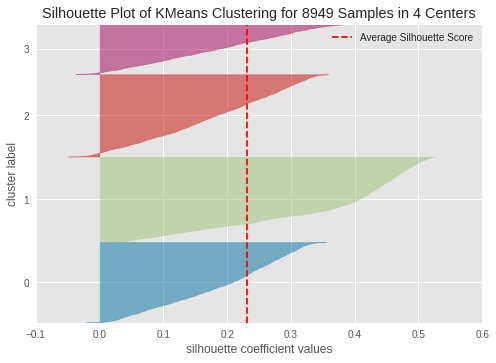

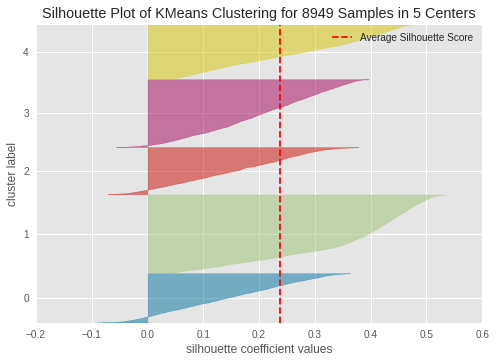

In [ ]:
for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(df_scaled)
  visualizer.show()

- **It Appears that having 3 Clusters will result in more Equally Distributed Clusters.**

## **With PCA**

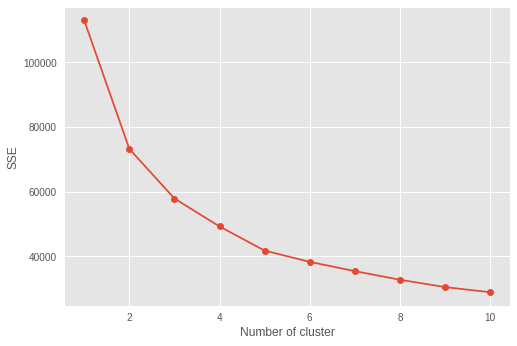

In [ ]:
n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmean= KMeans(n_cluster, random_state=0)

    kmean.fit(X_pca)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

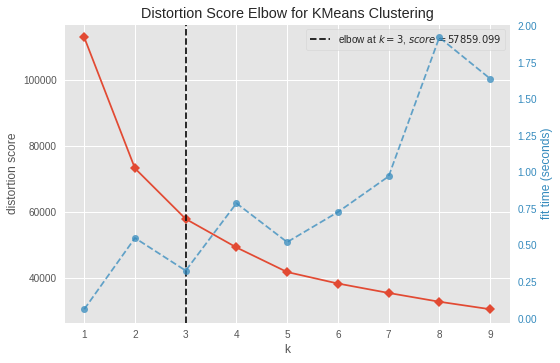

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(X_pca)
vis_elbow.poof()

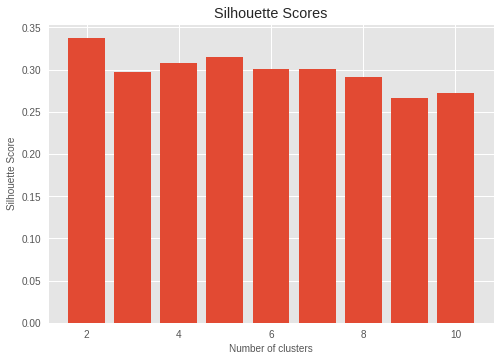

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(X_pca)

  silhouette_scores.append(silhouette_score(X_pca, labels))
    
plt.bar(range(2 , n_clusters+1), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()

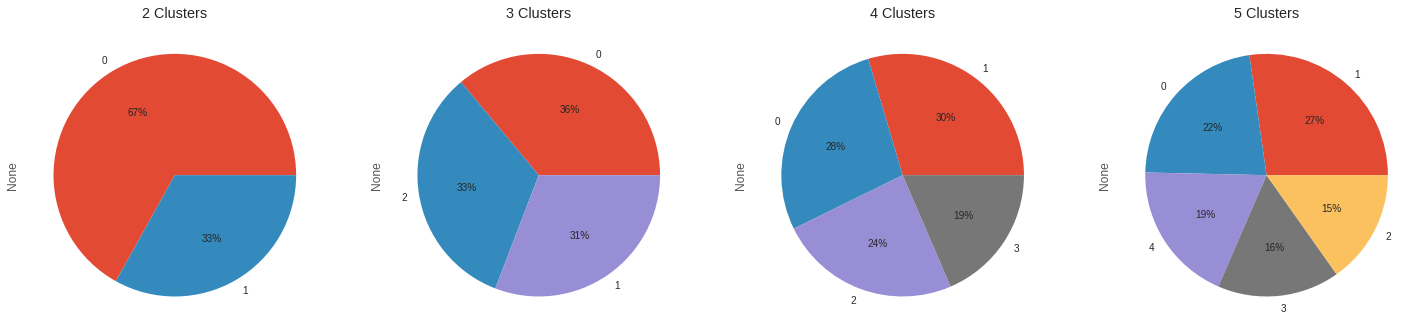

In [ ]:
plt.figure(figsize=(25,25))

for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  labels = kmeans.fit_predict(X_pca)

  labels = pd.Series(labels)

  ax = plt.subplot(1 , 4, i+1)

  ax.set_title(f"{n_cluster} Clusters")

  labels.value_counts().plot.pie(autopct='%1.0f%%', ax = ax)

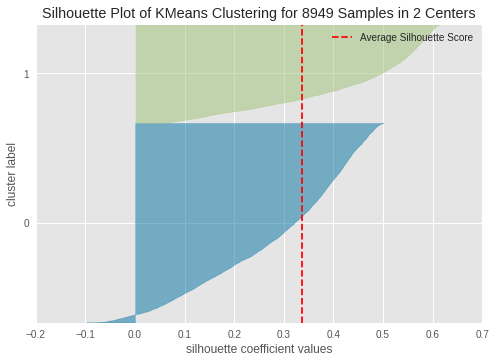

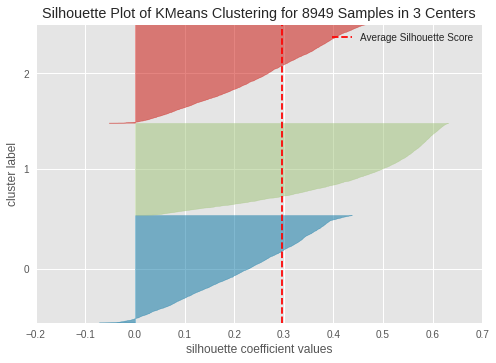

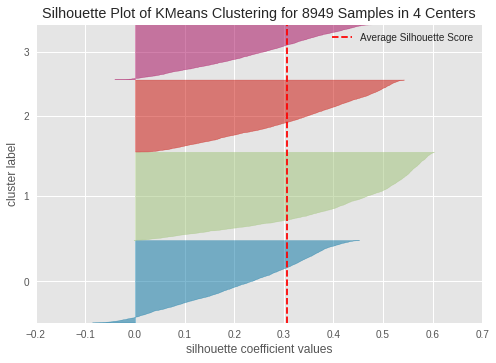

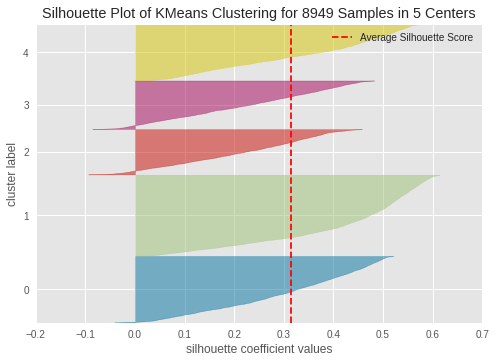

In [ ]:
for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(X_pca)
  visualizer.show()

- **Same Results appear when Using PCA but with Smaller SSE and Increased Silhouette Scores.**

## **Visualizing Clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=0)

pca_labels = kmeans.fit_predict(X_pca)

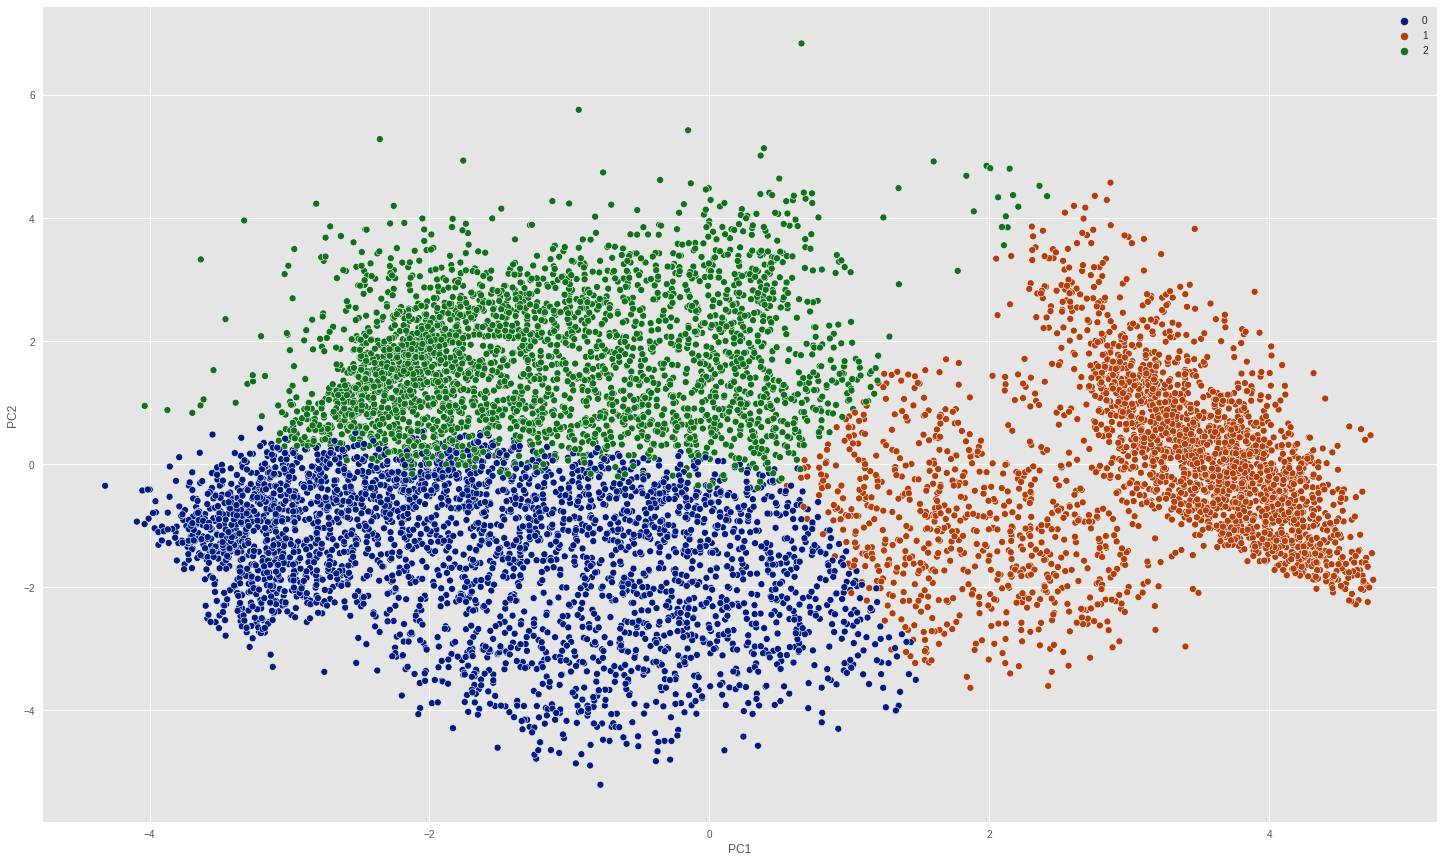

In [ ]:
plt.figure(figsize=(25,15))

ax = sns.scatterplot(x= X_pca["PC1"], y= X_pca["PC2"], hue = pca_labels, data = X_pca, palette='dark')
plt.show()

- **With 3 Clusters there are some Overlapping in the Clusters. Explaining their smaller silhoutte scores than 2 Clusters.**




In [ ]:
fig = px.scatter_3d( X_pca, x= X_pca["PC1"], y= X_pca["PC2"], z = X_pca["PC3"] , color = pca_labels)
fig.show()

## **Clusters Analysis**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

scaled_labesl = kmeans.fit_predict(df_scaled)

In [ ]:
df["Clusters"] = scaled_labesl

df["Clusters"] = df["Clusters"].astype('category')

df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40             0.000   
1     3202.467416           0.909091       0.00             0.000   
2     2495.148862           1.000000     773.17           773.170   
3     1666.670542           0.981818    1499.00           309.918   
4      817.714335           1.000000      16.00            16.000   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12             0.000   
8945    19.183215           1.000000     300.00             0.000   
8946    23.398673           0.833333     144.40             0.000   
8947    13.457564           0.833333       0.00             0.000   
8948   372.708075           1.000000    1093.25          1093.250   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   1068.127248             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       0.650000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000               0.0            6.0        1000.0   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            5.0        1000.0   
8947                0.166667               2.0            0.0         500.0   
8948                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE Clusters  
0      201.802084        139.509787          0.000000    12.0        0  
1     4103.032597       1072.340217          0.222222    12.0        2  
2      622.066742        627.284787          0.000000    12.0        1  
3        0.000000        312.452292          0.000000    12.0        2  
4      678.334763        244.791237          0.000000    12.0        0  
...           ...               ...               ...     ...      ...  
8944   325.594462         48.886365          0.016667    12.0        0  
89

<Figure size 1440x2520 with 0 Axes>

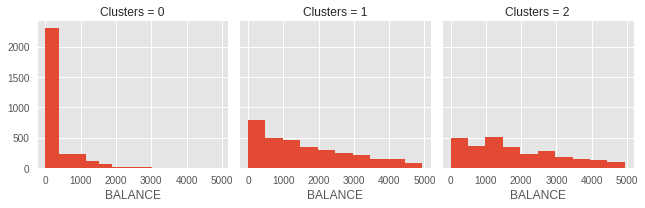

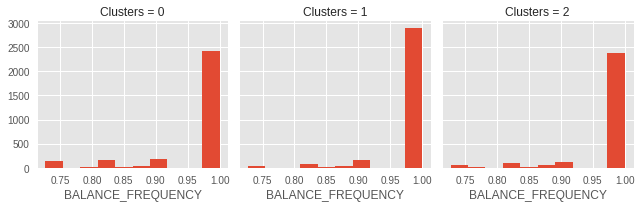

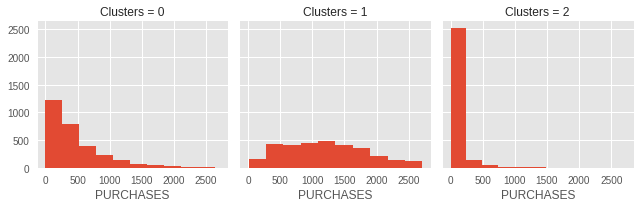

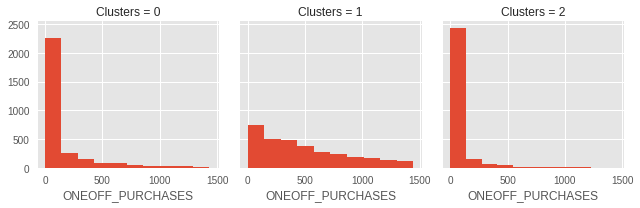

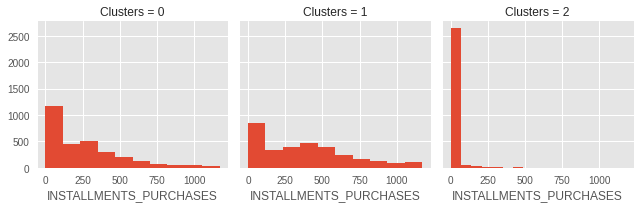

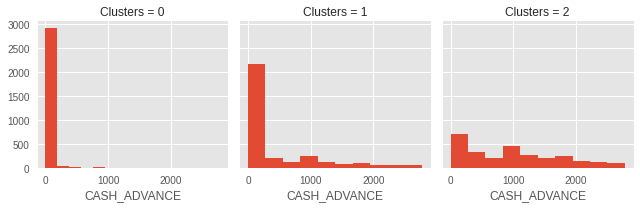

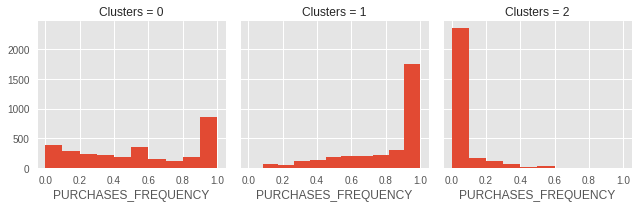

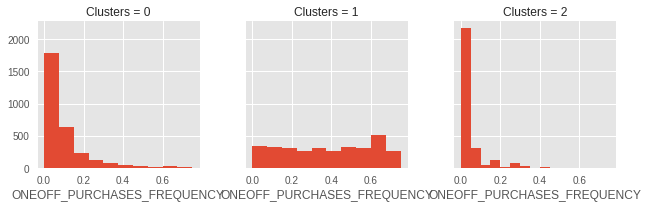

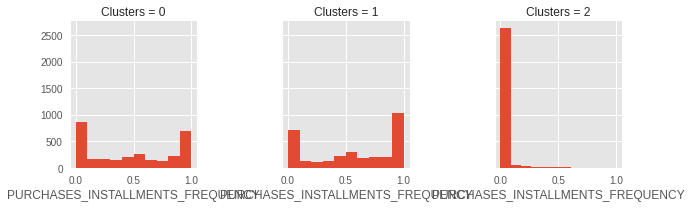

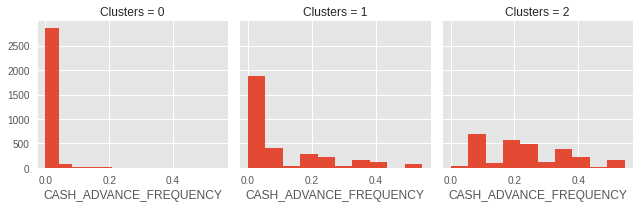

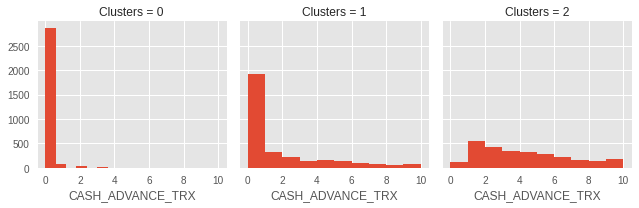

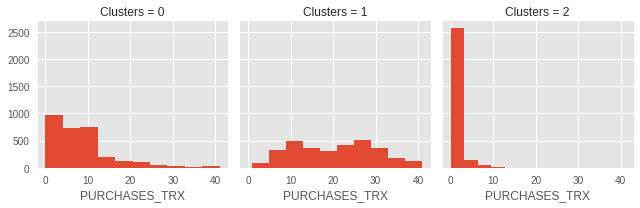

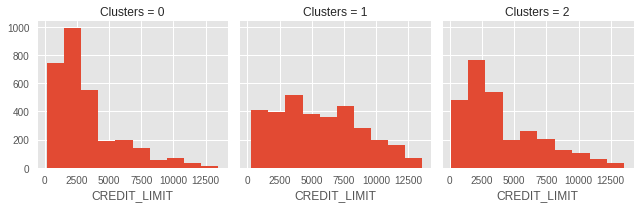

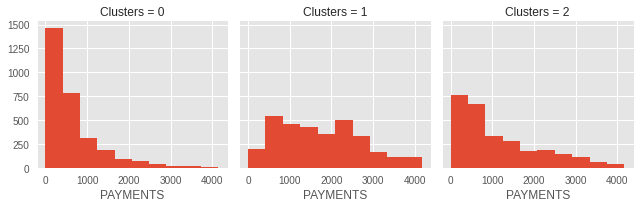

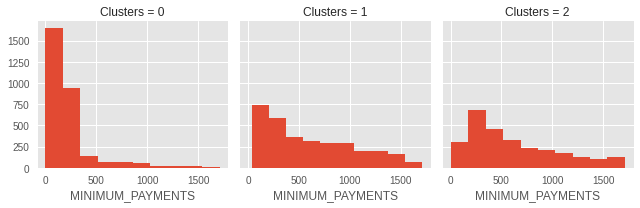

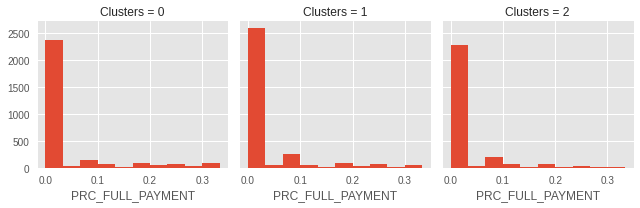

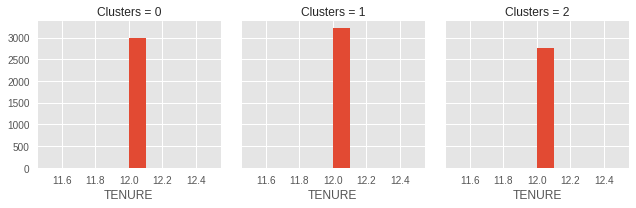

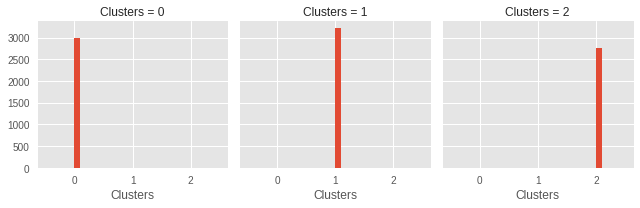

In [ ]:
plt.figure(figsize=(20,35))

for col in df.columns:

    grid = sns.FacetGrid(df, col='Clusters')

    grid.map(plt.hist, col)
    
    plt.show()

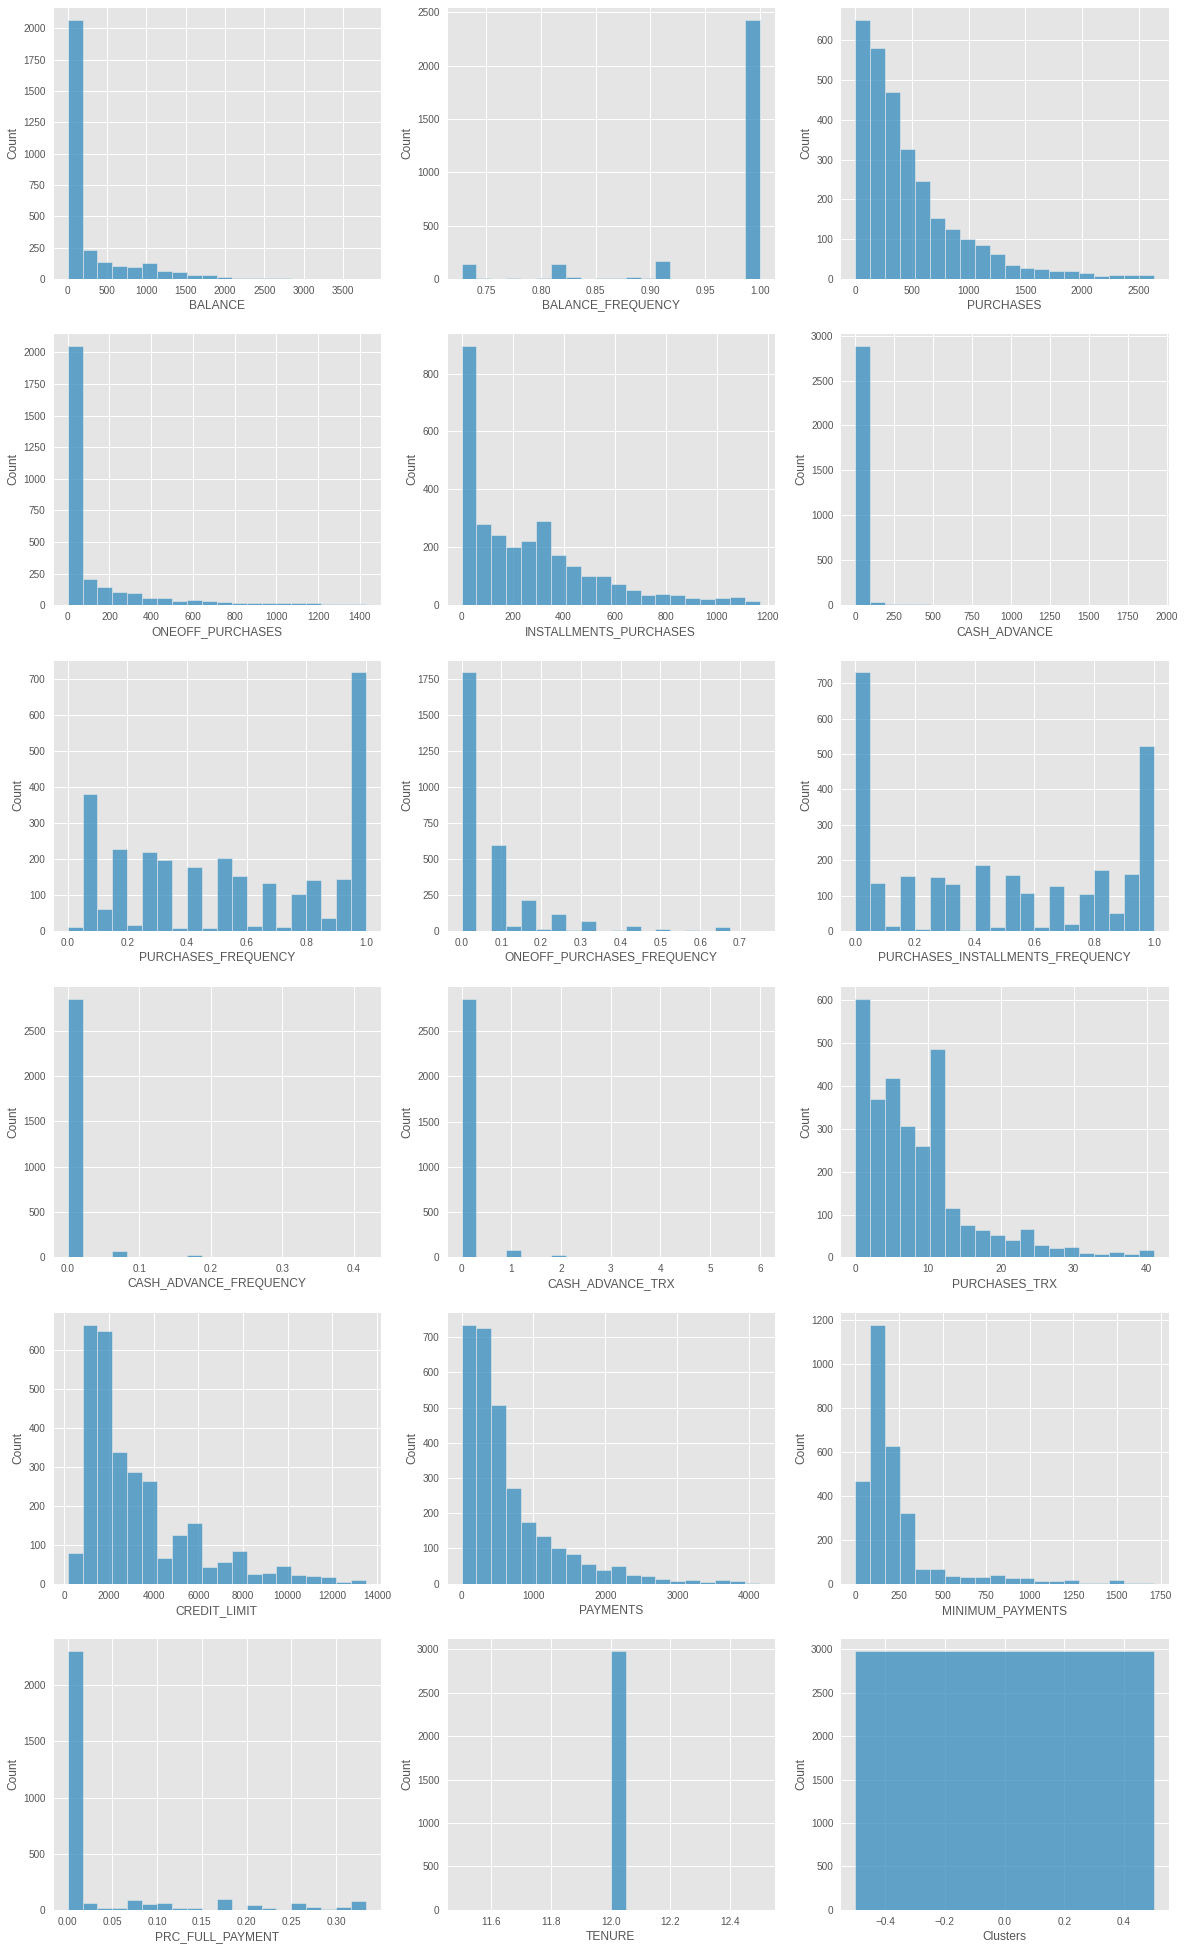

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 0])

        plt.xlabel(col)
        
plt.show()

- **Cluster 0 :**
 - **Customers with Lower balance But Update their Balance Frequently.**

 - **May Make Installment Purchases and doesn't Prefer Paying in Advance.**

 - **Purchase Frequently with Low Payments and they have a Low Credit Limit.**


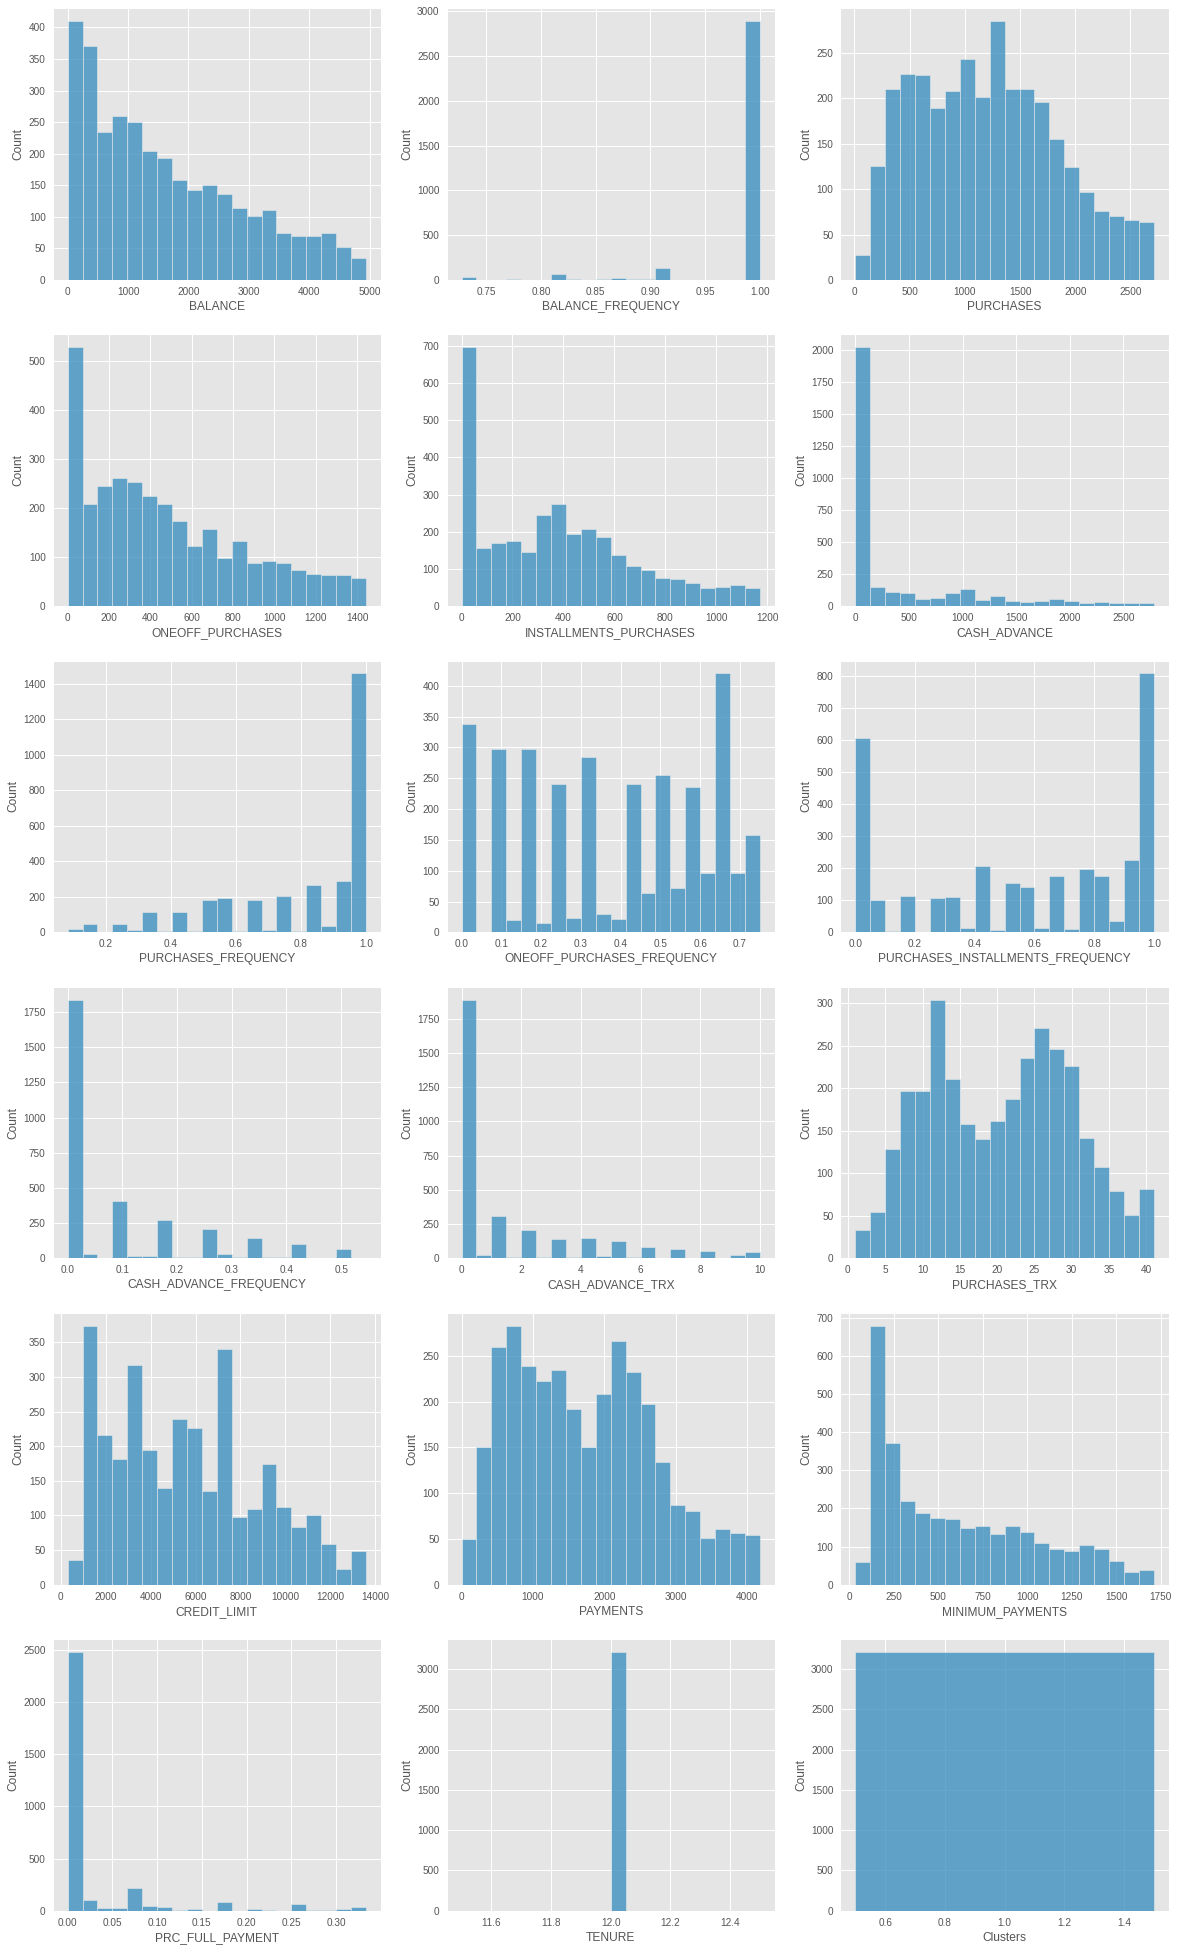

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 1])

        plt.xlabel(col)
        
plt.show()

- **Cluster 1 :**
 - **Customers with Medium Balance, Update their Balance More Frequently.** 

 - **With Medium Purchases Amount and pay more in Single Transaction, Prefer more Installment Purchases.**

 - **Purchase More Frequently with High Payments and they have a High Credit Limit.**

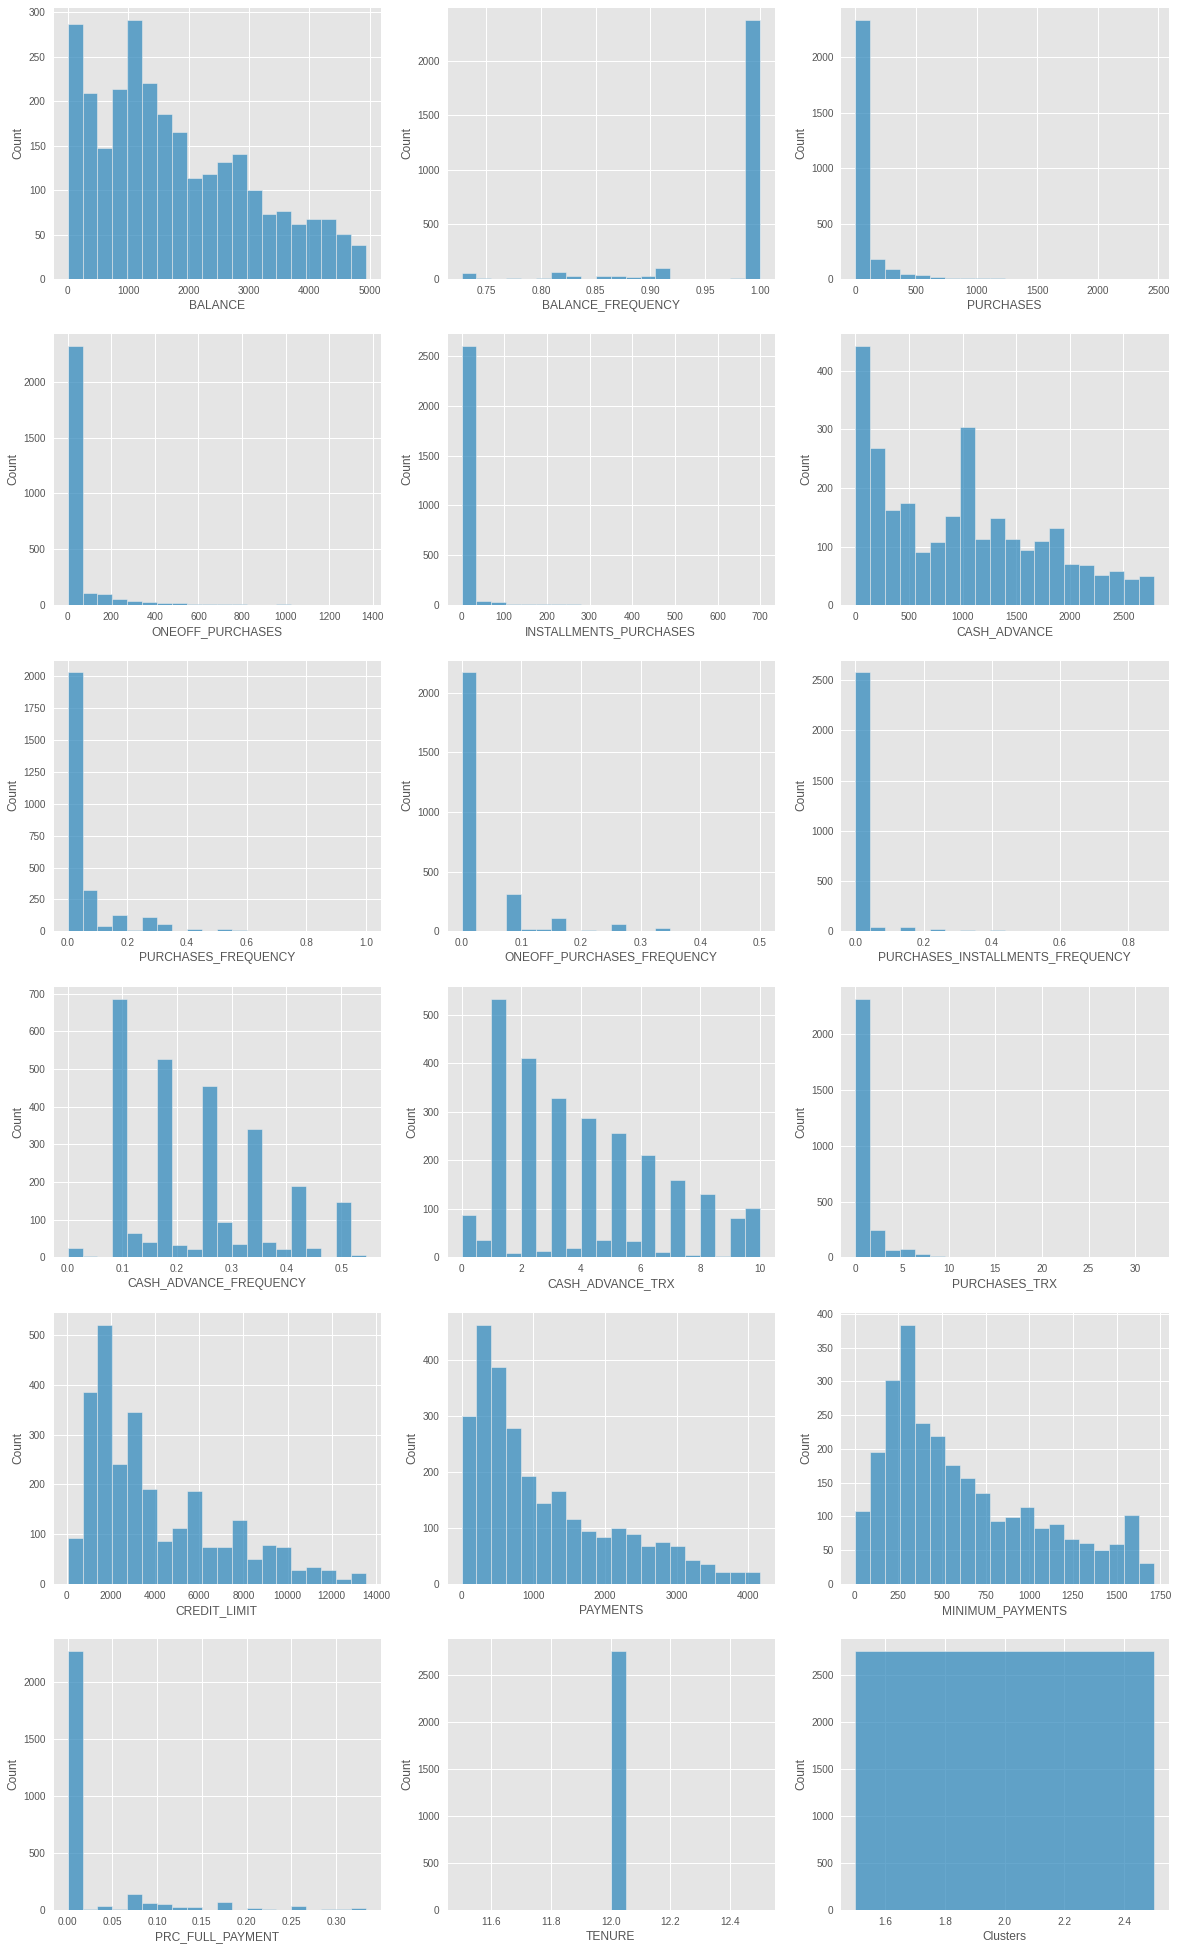

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 2])

        plt.xlabel(col)
        
plt.show()

- **Cluster 2 :**
 - **Customers with Above Medium Balance.**

 - **Doesn't Prefer Installment Purchases , But Prefer to Pay in advance.**

 - **Doesn't Purchase Frequently but when they do it's with Medium Payments and they have a Medium Credit Limit.**